In [618]:
import warnings

warnings.filterwarnings("ignore")
from IPython.display import display

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn import metrics
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline 
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)


In [619]:
#Setting a good spread of max visualization of rows 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

raw_data = pd.read_csv('./Loan_Modelling.csv')
print(f'There are {raw_data.shape[0]} rows and {raw_data.shape[1]} columns.')

# Sampling the data to get a general sense of the appearance of the data
np.random.seed(1) # Setting the random seed to 1, to be able to re-sample the same ones
raw_data.sample(n=20)

There are 5000 rows and 14 columns.


ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
2764  2765   31           5      84    91320       1   2.90          3   
4767  4768   35           9      45    90639       3   0.90          1   
3814  3815   34           9      35    94304       3   1.30          1   
3499  3500   49          23     114    94550       1   0.30          1   
2735  2736   36          12      70    92131       3   2.60          2   
3922  3923   31           4      20    95616       4   1.50          2   
2701  2702   50          26      55    94305       1   1.60          2   
1179  1180   36          11      98    90291       3   1.20          3   
932    933   51          27     112    94720       3   1.80          2   
792    793   41          16      98    93117       1   4.00          3   
1852  1853   32           6      54    94596       4   1.80          3   
1185  1186   43          19      31    94025       3   0.50          1   
1724  1725   46          19      24    90025       3   0.67          2   
4080  4081   27           0      40    90068       1   2.00          2   
3823  3824   49          25      44    94708       4   0.90          2   
4054  4055   59          34      64    94116       4   1.70          1   
2721  2722   58          33     173    92121       2   7.20          3   
3903  3904   47          23      65    93943       1   0.00          1   
1865  1866   36           6      90    91342       4   1.80          3   
759    760   53          28      59    91950       2   1.90          2   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
2764       105              0                   0           0       0   
4767       101              0                   1           0       0   
3814         0              0                   0           0       0   
3499       286              0                   0           0       1   
2735       165              0                   0           0       1   
3922         0              0                   0           0       1   
2701         0              0                   0           0       1   
1179         0              0                   1           0       0   
932          0              0                   1           1       1   
792          0              0                   0           0       0   
1852       167              0                   0           0       0   
1185         0              0                   0           0       0   
1724         0              0                   0           0       1   
4080       110              0                   0           0       0   
3823       194              0                   0           0       1   
4054         0              0                   0           0       0   
2721         0              1                   0           0       1   
3903         0              0                   0           0       0   
1865         0              0                   1           0       0   
759          0              0                   0           0       1   

      CreditCard  
2764           1  
4767           0  
3814           0  
3499           0  
2735           0  
3922           0  
2701           0  
1179           1  
932            1  
792            1  
1852           0  
1185           0  
1724           0  
4080           1  
3823           0  
4054           0  
2721           0  
3903           0  
1865           0  
759            0

Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

In this study, Personal_Loans serves as our variable of interest. We will be matching uncovered key variables and explore how they cluster around the people that accepted the offer. Special interest will be given to customers that are already depositors, as declared by Securities_Account and CD_Account

In [620]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


No missing or null values, YAY!

In [621]:
raw_data.drop(columns=["ID","ZIPCode"]).describe().T

count       mean         std   min   25%   50%    75%  \
Age                 5000.0  45.338400   11.463166  23.0  35.0  45.0   55.0   
Experience          5000.0  20.104600   11.467954  -3.0  10.0  20.0   30.0   
Income              5000.0  73.774200   46.033729   8.0  39.0  64.0   98.0   
Family              5000.0   2.396400    1.147663   1.0   1.0   2.0    3.0   
CCAvg               5000.0   1.937938    1.747659   0.0   0.7   1.5    2.5   
Education           5000.0   1.881000    0.839869   1.0   1.0   2.0    3.0   
Mortgage            5000.0  56.498800  101.713802   0.0   0.0   0.0  101.0   
Personal_Loan       5000.0   0.096000    0.294621   0.0   0.0   0.0    0.0   
Securities_Account  5000.0   0.104400    0.305809   0.0   0.0   0.0    0.0   
CD_Account          5000.0   0.060400    0.238250   0.0   0.0   0.0    0.0   
Online              5000.0   0.596800    0.490589   0.0   0.0   1.0    1.0   
CreditCard          5000.0   0.294000    0.455637   0.0   0.0   0.0    1.0   

                      max  
Age                  67.0  
Experience           43.0  
Income              224.0  
Family                4.0  
CCAvg                10.0  
Education             3.0  
Mortgage            635.0  
Personal_Loan         1.0  
Securities_Account    1.0  
CD_Account            1.0  
Online                1.0  
CreditCard            1.0

In [622]:
# check the values of 
# each row for each column
n = raw_data.nunique(axis=0)
  
print("No.of.unique values in each column :\n",
      n)

No.of.unique values in each column :
 ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64


Given that most numerical values with >50 unique values can be considered continuous, we should observe the other variables to determine if they can be grouped or continued to be treated as continuous (e.g. age). ZIP Code values could potentially also be turned into categoricals.

In [623]:
# We know that we don't care about ID as a variable. However, Zip code might be convenient to determine if they can be clustered
# 
print('There are a total of :', len(raw_data['ZIPCode'].unique()), 'unique ZIP codes')

print()

print(f'The largest ZIP code is {np.max(raw_data.ZIPCode)} and the smallest ZIP code {np.min(raw_data.ZIPCode)}')

There are a total of : 467 unique ZIP codes

The largest ZIP code is 96651 and the smallest ZIP code 90005


Given the amount of inividual ZIP Codes we can potentially group them for smaller groups.

From Wikipedia:
ZIP Codes are numbered with:
- the first digit representing a certain group of U.S. states
- the second and third digits together representing a region in that group (or perhaps a large city)
- the fourth and fifth digits representing a group of delivery addresses within that region.

So potentially, by using the second and third digits we could potentially group them effectively.

There is also a wide spread in max values for variables, so for our regression models the data will need to be scaled. This will be stored in its own dataframe.

In [624]:
ZIPCode_original = pd.Series([np.int([*str(x)][0]+[*str(x)][1]+[*str(x)][2]) for x in raw_data['ZIPCode'].values])

u = ZIPCode_original.nunique()

print('The total number of unique regions is :\n',
u)

DOI = raw_data.drop(columns=['ID','ZIPCode']).copy() #DOI stands for data of interest
DOI['ZIPCode_upd'] = ZIPCode_original

DOI.sample(n=20)

The total number of unique regions is :
 57


Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
473    64          39     182       1   1.20          2       547   
2932   41          16     154       1   7.00          1         0   
3982   24           0     119       1   1.50          1         0   
881    44          19     154       2   8.80          1         0   
3158   54          28      64       2   0.80          3         0   
4714   27           3      81       3   1.50          1       307   
4920   42          16      28       4   1.50          3        91   
2878   45          19     122       4   4.10          2         0   
278    50          26      21       4   1.00          1         0   
986    53          27     101       4   4.90          1         0   
845    44          17      29       3   1.00          2         0   
3840   56          31      35       3   0.10          2       114   
63     42          17      32       4   0.00          2         0   
1756   42          17      23       2   0.00          3         0   
895    43          17      84       4   2.60          3       289   
2619   33           8      62       3   2.30          1        98   
4957   29          -1      50       2   1.75          3         0   
47     37          12     194       4   0.20          3       211   
3050   50          25      58       1   1.30          2         0   
691    45          18      48       3   2.50          2       113   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
473               1                   0           0       1           0   
2932              0                   0           0       0           1   
3982              0                   0           0       1           0   
881               0                   0           0       1           0   
3158              0                   1           0       1           0   
4714              0                   1           1       1           1   
4920              0                   0           0       1           1   
2878              1                   0           0       1           0   
278               0                   0           0       1           0   
986               0                   0           0       1           0   
845               0                   0           0       1           1   
3840              0                   0           0       0           0   
63                0                   0           0       1           0   
1756              0                   0           0       0           0   
895               0                   1           1       1           1   
2619              0                   0           0       0           1   
4957              0                   0           0       0           1   
47                1                   1           1       1           1   
3050              0                   0           0       1           0   
691               0                   0           0       1           1   

      ZIPCode_upd  
473           939  
2932          924  
3982          945  
881           921  
3158          900  
4714          902  
4920          940  
2878          945  
278           911  
986           902  
845           947  
3840          952  
63            945  
1756          950  
895           946  
2619          920  
4957          958  
47            913  
3050          921  
691           900

# Univariate Analysis

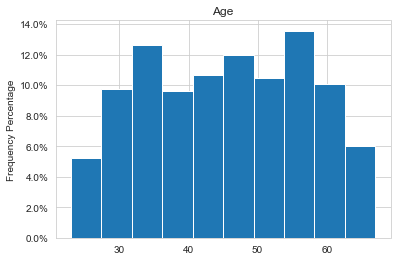

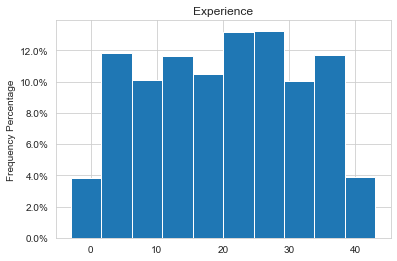

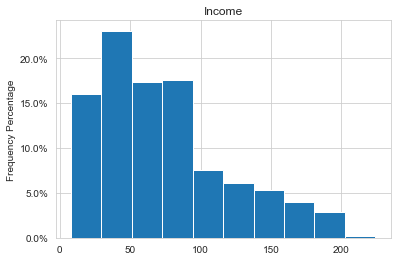

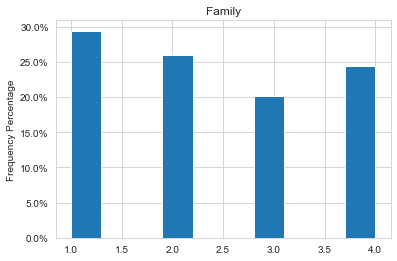

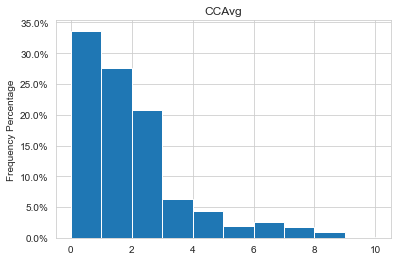

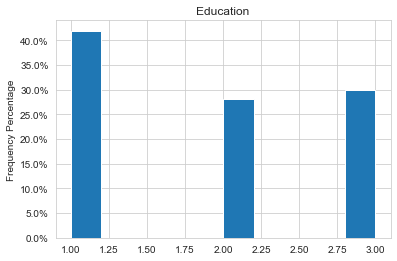

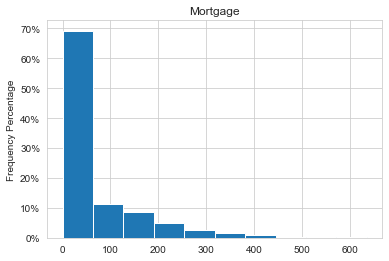

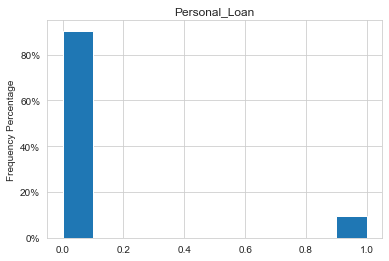

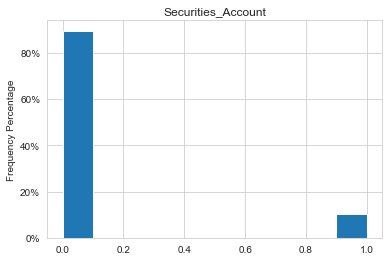

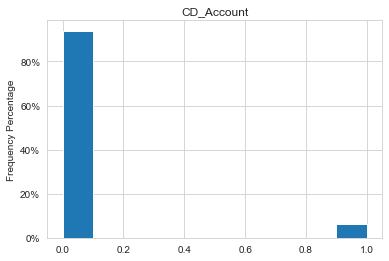

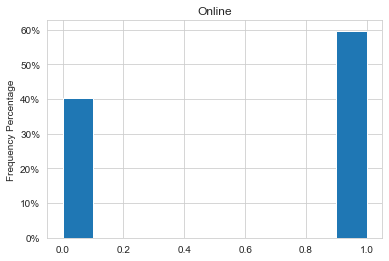

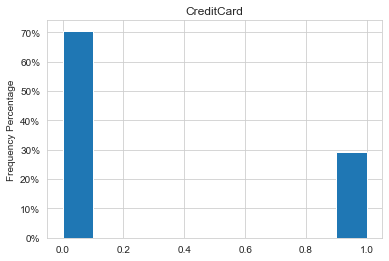

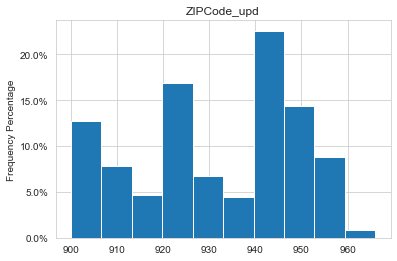

In [625]:
for x in DOI.columns:
    DOI[str(x)].hist(weights=np.ones(len(DOI[str(x)])) / len(DOI[str(x)]))
    plt.title(x)
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.ylabel('Frequency Percentage')
    plt.show()

Just from looking at these histograms, it doesn't seem clear what are the distributions of customers for this bank. It is critical to assess what is the make up of customers and then assess the distribution of customers and determine if there is any correlation between the kind of customers and the acceptance of the previous offer.

In [626]:
# Selecting the variables that correspond to active users
# The customer based would be defined by: CCavg (non-zero values), Mortgage (non-zero values), Securities_Account (one values),
# CD_Account (one values)

pd.options.mode.chained_assignment = None

customer = DOI[['CCAvg','Mortgage','Securities_Account','CD_Account']]
customer.loc[customer['CCAvg']>0, 'CCAvg'] = 1
customer.loc[customer['Mortgage']>0, 'Mortgage'] = 1

print("The percent of zero activity customers is:")
print("{:.2f}".format(100*len(customer[(customer == 0).all(axis=1)])/len(customer)),
'%. Of those',
"{:.2f}".format(100*len(customer[((DOI[['CCAvg','Mortgage','Securities_Account','CD_Account']] == 0).all(axis=1) & DOI['Personal_Loan']==1)])/len(customer[(DOI[['CCAvg','Mortgage','Securities_Account','CD_Account']] == 0).all(axis=1)])),
'% accepted the offer')
print()

CC_customer = len(DOI[(DOI['CCAvg']!=0)])/len(DOI) # in percentage
print("The percent of credit card users is:")
print("{:.2f}".format(100*CC_customer),'%. Of those',
"{:.2f}".format(100*len(DOI[(DOI['CCAvg']!=0) & (DOI['Personal_Loan'] == 1)])/len(DOI[(DOI['CCAvg']!=0)])),
'% accepted the offer')
print()

Mortgage_customer = len(DOI[DOI['Mortgage']!=0])/len(DOI) # in percentage
print("The percent of users with mortgages is:")
print("{:.2f}".format(100*Mortgage_customer),'%. Of those',
"{:.2f}".format(100*len(DOI[(DOI['Mortgage']!=0) & (DOI['Personal_Loan'] == 1)])/len(DOI[DOI['Mortgage']!=0])),
'% accepted the offer')
print()

Savings_customer = len(DOI[DOI['Securities_Account']==1])/len(DOI) # in percentage
print("The percent of users with savings account is:")
print("{:.2f}".format(100*Savings_customer),'%. Of those',
"{:.2f}".format(100*len(DOI[(DOI['Securities_Account']==1) & (DOI['Personal_Loan'] == 1)])/len(DOI[DOI['Securities_Account']==1])),
'% accepted the offer')
print()

Checkings_customer = len(DOI['CD_Account'].loc[DOI['CD_Account']==1])/len(DOI) # in percentage
print("The percent of users with checkings account is:")
print("{:.2f}".format(100*Checkings_customer),'%. Of those',
"{:.2f}".format(100*len(DOI[(DOI['CD_Account']==1) & (DOI['Personal_Loan'] == 1)])/len(DOI[DOI['CD_Account']==1])),
'% accepted the offer')
print()



The percent of zero activity customers is:
1.38 %. Of those 1.45 % accepted the offer

The percent of credit card users is:
97.88 %. Of those 9.79 % accepted the offer

The percent of users with mortgages is:
30.76 %. Of those 10.92 % accepted the offer

The percent of users with savings account is:
10.44 %. Of those 11.49 % accepted the offer

The percent of users with checkings account is:
6.04 %. Of those 46.36 % accepted the offer



In [627]:
from itertools import chain
try:
    # since python 3.10
    from collections.abc import Iterable
except ImportError:
    from collections import Iterable
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import colors
import math

default_colors = [
    # r, g, b, a
    [92, 192, 98, 0.5],
    [90, 155, 212, 0.5],
    [246, 236, 86, 0.6],
    [241, 90, 96, 0.4],
    [255, 117, 0, 0.3],
    [82, 82, 190, 0.2],
]
default_colors = [
    [i[0] / 255.0, i[1] / 255.0, i[2] / 255.0, i[3]]
    for i in default_colors
]

def draw_ellipse(fig, ax, x, y, w, h, a, fillcolor):
    e = patches.Ellipse(
        xy=(x, y),
        width=w,
        height=h,
        angle=a,
        color=fillcolor)
    ax.add_patch(e)


def draw_text(fig, ax, x, y, text, color=[0, 0, 0, 1], fontsize=14, ha="center", va="center"):
    ax.text(
        x, y, text,
        horizontalalignment=ha,
        verticalalignment=va,
        fontsize=fontsize,
        color="black")

def draw_annotate(fig, ax, x, y, textx, texty, text, color=[0, 0, 0, 1], arrowcolor=[0, 0, 0, 0.3]):
    plt.annotate(
        text,
        xy=(x, y),
        xytext=(textx, texty),
        arrowprops=dict(color=arrowcolor, shrink=0, width=0.5, headwidth=8),
        fontsize=14,
        color=color,
        xycoords="data",
        textcoords="data",
        horizontalalignment='center',
        verticalalignment='center'
    )

def get_labels(data, fill=["number"]):
    """
    get a dict of labels for groups in data

    @type data: list[Iterable]
    @rtype: dict[str, str]

    input
      data: data to get label for
      fill: ["number"|"logic"|"percent"]

    return
      labels: a dict of labels for different sets

    example:
    In [12]: get_labels([range(10), range(5,15), range(3,8)], fill=["number"])
    Out[12]:
    {'001': '0',
     '010': '5',
     '011': '0',
     '100': '3',
     '101': '2',
     '110': '2',
     '111': '3'}
    """

    N = len(data)

    sets_data = [set(data[i]) for i in range(N)]  # sets for separate groups
    s_all = set(chain(*data))                     # union of all sets

    # bin(3) --> '0b11', so bin(3).split('0b')[-1] will remove "0b"
    set_collections = {}
    for n in range(1, 2**N):
        key = bin(n).split('0b')[-1].zfill(N)
        value = s_all
        sets_for_intersection = [sets_data[i] for i in range(N) if  key[i] == '1']
        sets_for_difference = [sets_data[i] for i in range(N) if  key[i] == '0']
        for s in sets_for_intersection:
            value = value & s
        for s in sets_for_difference:
            value = value - s
        set_collections[key] = value

    labels = {k: "" for k in set_collections}
    if "logic" in fill:
        for k in set_collections:
            labels[k] = k + ": "
    if "number" in fill:
        for k in set_collections:
            labels[k] += str(len(set_collections[k]))
    if "percent" in fill:
        data_size = len(s_all)
        for k in set_collections:
            labels[k] += "(%.2f%%)" % (100.0 * len(set_collections[k]) / data_size)

    return labels

def venn4(labels, names=['A', 'B', 'C', 'D'], **options):
    
    # plots a 4-set Venn diagram

    # @type labels: dict[str, str]
    # @type names: list[str]
    # @rtype: (Figure, AxesSubplot)

    # input
    #   labels: a label dict where keys are identified via binary codes ('0001', '0010', '0100', ...),
    #           hence a valid set could look like: {'0001': 'text 1', '0010': 'text 2', '0100': 'text 3', ...}.
    #           unmentioned codes are considered as ''.
    #   names:  group names
    #   more:   colors, figsize, dpi, fontsize

    # return
    #   pyplot Figure and AxesSubplot object
    
    colors = options.get('colors', [default_colors[i] for i in range(4)])
    figsize = options.get('figsize', (12, 12))
    dpi = options.get('dpi', 96)
    fontsize = options.get('fontsize', 14)

    fig = plt.figure(0, figsize=figsize, dpi=dpi)
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_axis_off()
    ax.set_ylim(bottom=0.0, top=1.0)
    ax.set_xlim(left=0.0, right=1.0)

    # body
    draw_ellipse(fig, ax, 0.350, 0.400, 0.72, 0.45, 140.0, colors[0])
    draw_ellipse(fig, ax, 0.450, 0.500, 0.72, 0.45, 140.0, colors[1])
    draw_ellipse(fig, ax, 0.544, 0.500, 0.72, 0.45, 40.0, colors[2])
    draw_ellipse(fig, ax, 0.644, 0.400, 0.72, 0.45, 40.0, colors[3])
    draw_text(fig, ax, 0.85, 0.42, labels.get('0001', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.68, 0.72, labels.get('0010', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.77, 0.59, labels.get('0011', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.32, 0.72, labels.get('0100', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.71, 0.30, labels.get('0101', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.50, 0.66, labels.get('0110', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.65, 0.50, labels.get('0111', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.14, 0.42, labels.get('1000', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.50, 0.17, labels.get('1001', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.29, 0.30, labels.get('1010', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.39, 0.24, labels.get('1011', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.23, 0.59, labels.get('1100', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.61, 0.24, labels.get('1101', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.35, 0.50, labels.get('1110', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.50, 0.38, labels.get('1111', ''), fontsize=fontsize)

    # legend
    draw_text(fig, ax, 0.13, 0.18, names[0], colors[0], fontsize=fontsize, ha="right")
    draw_text(fig, ax, 0.18, 0.83, names[1], colors[1], fontsize=fontsize, ha="right", va="bottom")
    draw_text(fig, ax, 0.82, 0.83, names[2], colors[2], fontsize=fontsize, ha="left", va="bottom")
    draw_text(fig, ax, 0.87, 0.18, names[3], colors[3], fontsize=fontsize, ha="left", va="top")
    leg = ax.legend(names, loc='center left', bbox_to_anchor=(1.0, 0.5), fancybox=True)
    leg.get_frame().set_alpha(0.5)

    return fig, ax




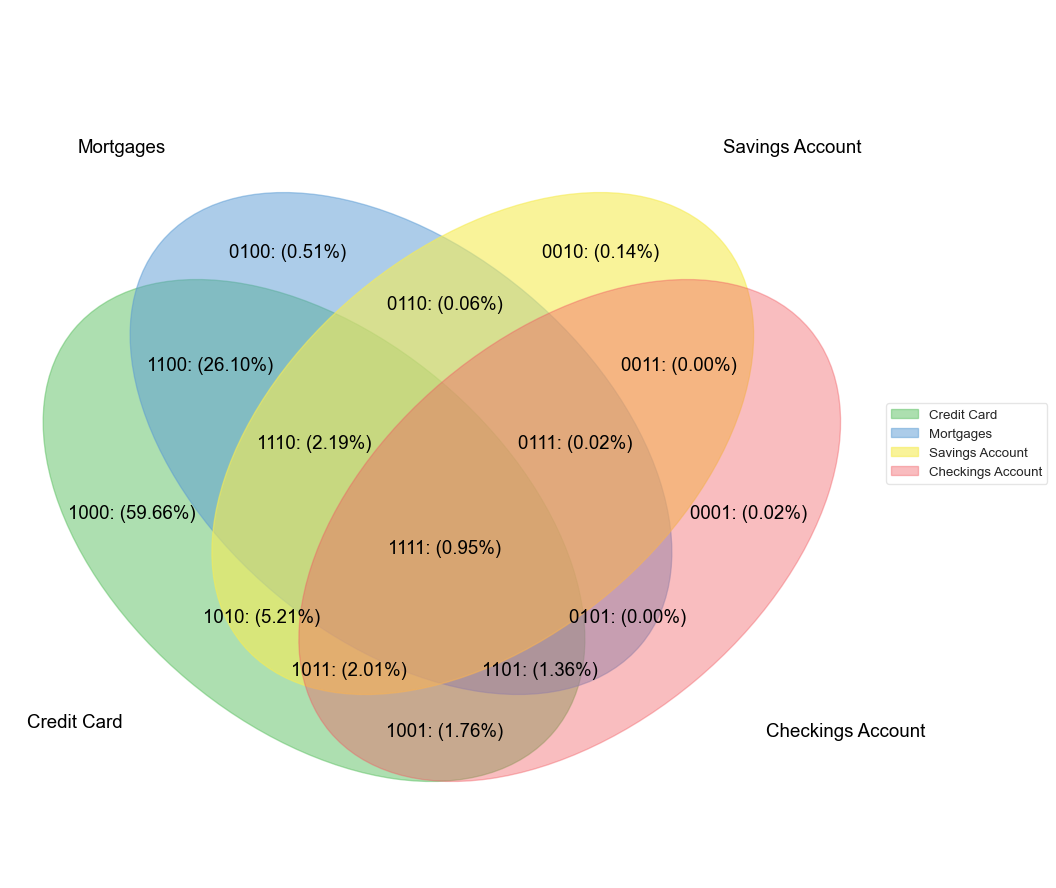

In [628]:
# To see the overlap between clients we will use the Inclusion-Exclusion Principle

# |A∪B∪C∪D|=
# |A|+|B|+|C|+|D|} all singletons
# −(|A∩B|+|A∩C|+|A∩D|+|B∩C|+|B∩D|+|C∩D|)} all pairs
# +(|A∩B∩C|+|A∩B∩D|+|A∩C∩D|+|B∩C∩D|)} all triples
# −|A∩B∩C∩D|} all quadruples

Cr = set(customer.CCAvg*raw_data.ID)
Cr.remove(0.0)
Mo = set(customer.Mortgage*raw_data.ID)
Mo.remove(0.0)
Sa = set(customer.Securities_Account*raw_data.ID)
Sa.remove(0.0)
Ch = set(customer.CD_Account*raw_data.ID)
Ch.remove(0.0)

#The intersections were calculated and stored as variables in case they are of use later in the analysis
CrMo = Cr & Mo #Computes intersection of set of Credit Card and Mortgages
CrSa = Cr & Sa
CrCh = Cr & Ch
MoSa = Mo & Sa
MoCh = Mo & Ch
SaCh = Sa & Ch
CrMoSa = Cr & Mo & Sa
CrMoCh = Cr & Mo & Ch
CrSaCh = Cr & Sa & Ch
MoSaCh = Mo & Sa & Ch
CrMoSaCh = Cr & Mo & Sa & Ch

Cr_only = Cr - CrMo - CrSa - CrCh
Mo_only = Mo - CrMo - MoSa - MoCh
Sa_only = Sa - CrSa - MoSa - SaCh
Ch_only = Ch - CrCh - MoCh - SaCh

CrMo_only = CrMo - CrMoSa - CrMoCh
CrSa_only = CrSa - CrMoSa - CrSaCh
CrCh_only = CrCh - CrSaCh - CrMoCh
MoSa_only = MoSa - CrMoSa - MoSaCh
MoCh_only = MoCh - CrMoCh - MoSaCh
SaCh_only = SaCh - CrSaCh - MoSaCh

CrMoSa_only = CrMoSa - CrMoSaCh
CrMoCh_only = CrMoCh - CrMoSaCh
CrSaCh_only = CrSaCh - CrMoSaCh
MoSaCh_only = MoSaCh - CrMoSaCh


labels = get_labels([Cr, Mo, Sa, Ch], fill=['percent', 'logic'])
fig, ax = venn4(labels, names=['Credit Card', 'Mortgages', 'Savings Account', 'Checkings Account'])
fig.show()

Using a Venn diagram, we can more clearly see the overlap between customers. We see that most of the businesses clients are Credid Card users with 59.66%. This is followed by people with Mortgages. However, very few people interact with the bank exclusively through Mortgages, but rather (with 26%) the second highest clientele group is customers with Mortgages that also have Credit Cards.

Finally, we see that similar to the histograms above, very few of the businesses customers are composed of people owning accounts.

We shall now separate these distributions between people that didn't take the offer, and more importantly for people that did.

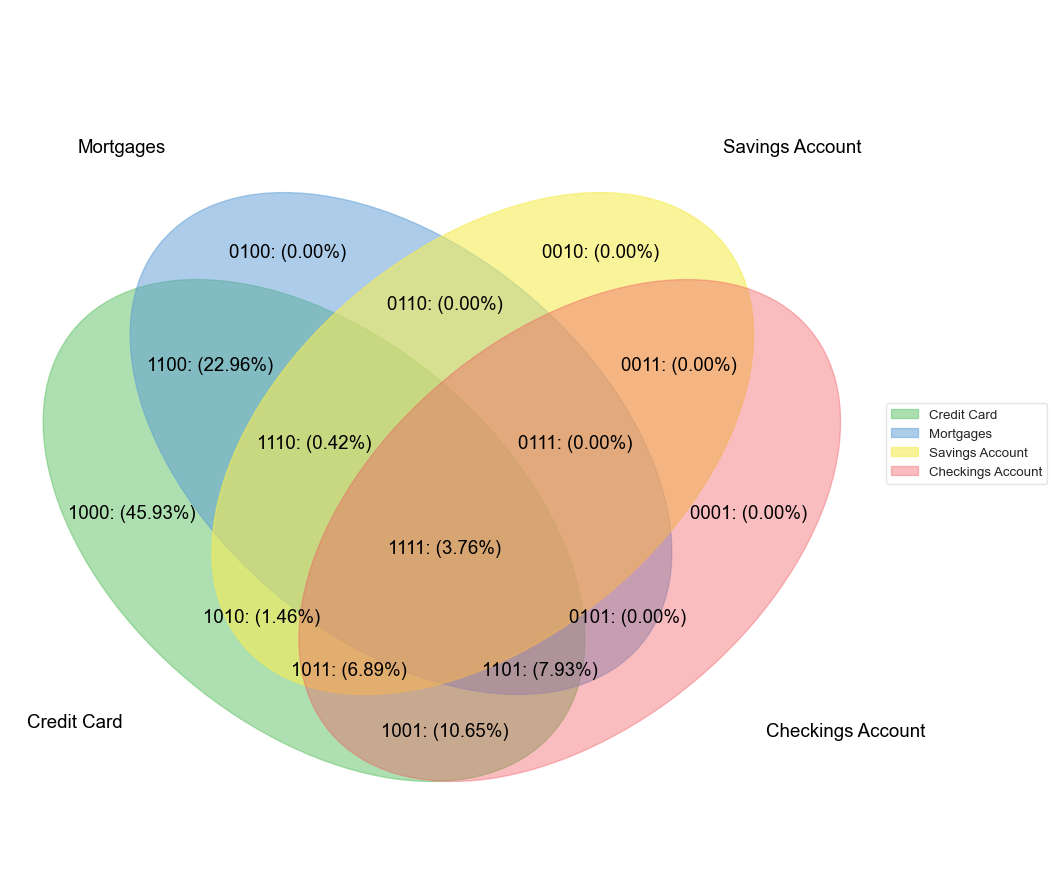

In [629]:
#First we will see the distribution for people that did take the offer

Cr = set(customer.CCAvg*raw_data.Personal_Loan*raw_data.ID)
Cr.remove(0.0)
Mo = set(customer.Mortgage*raw_data.Personal_Loan*raw_data.ID)
Mo.remove(0.0)
Sa = set(customer.Securities_Account*raw_data.Personal_Loan*raw_data.ID)
Sa.remove(0.0)
Ch = set(customer.CD_Account*raw_data.Personal_Loan*raw_data.ID)
Ch.remove(0.0)

labels = get_labels([Cr, Mo, Sa, Ch], fill=['percent', 'logic'])
fig, ax = venn4(labels, names=['Credit Card', 'Mortgages', 'Savings Account', 'Checkings Account'])
fig.show()

Very clearly, we see that the customers that took the offer are EXCLUSIVELY credit card users. This will likely play a big effect as we move forward.

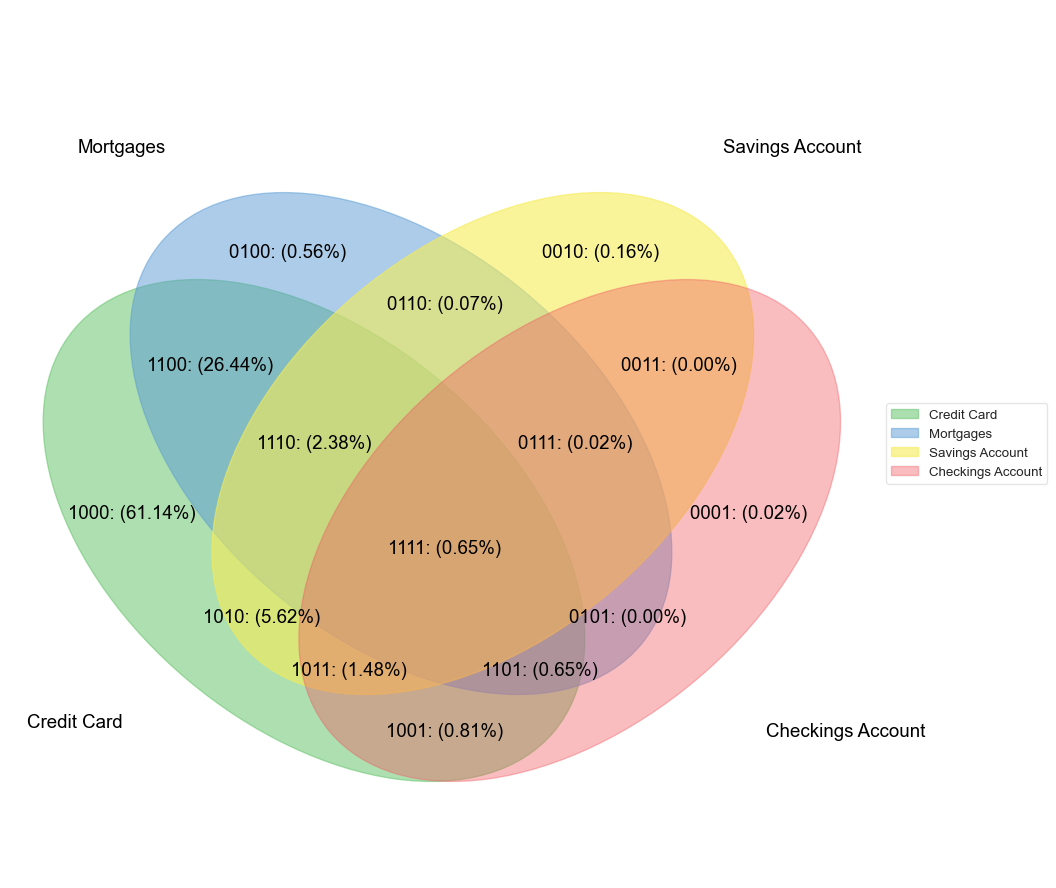

In [630]:
#Secondly we will see the distribution for clients that did not take the offer

Cr = set(customer.CCAvg*(-1*(raw_data.Personal_Loan-1))*raw_data.ID) # Swaps 0's for 1, and vice versa
Cr.remove(0.0)
Mo = set(customer.Mortgage*(-1*(raw_data.Personal_Loan-1))*raw_data.ID)
Mo.remove(0.0)
Sa = set(customer.Securities_Account*(-1*(raw_data.Personal_Loan-1))*raw_data.ID)
Sa.remove(0.0)
Ch = set(customer.CD_Account*(-1*(raw_data.Personal_Loan-1))*raw_data.ID)
Ch.remove(0.0)

labels = get_labels([Cr, Mo, Sa, Ch], fill=['percent', 'logic'])
fig, ax = venn4(labels, names=['Credit Card', 'Mortgages', 'Savings Account', 'Checkings Account'])
fig.show()

We can observe that the Personal Loan acceptance percentages increase for the clients that had more than one time of account with the bank when compared to the clients that only had one account. For example, the percentage of people only having a credit card account, a mortgage, a savings account or a  checking account went from 61.14%, 0.56%, 0.16% and 0.2% respectively for clients who did not take the offer to 45.93%, 0%, 0% and 0% respetively for clients that did accept the offer. Conversely, there seems to be a patterns that the ratio for clients that had 2 or more accounts increased for clients that accepted the offer (e.g. the ratio of clients that had both a checking account and a mortgage went from 0.81% to 10.65% between the clients who didn't accept the offer to people who did).

This implies that the distribution of account category of the client might be more informative than the actual level of usage.

Before adding this variable, we will construct our model with the present data. 

We can also compare the distributions of customers between the general population and distributions for customers that accepted the offer.

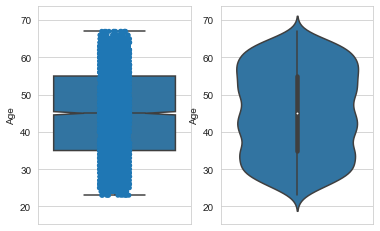

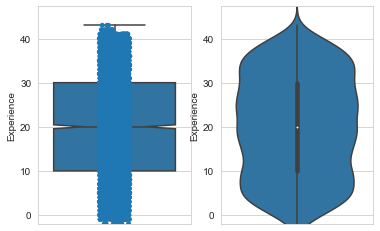

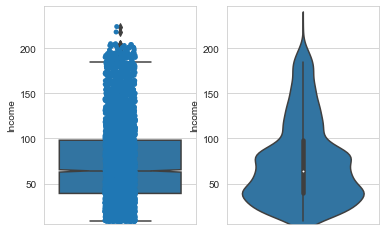

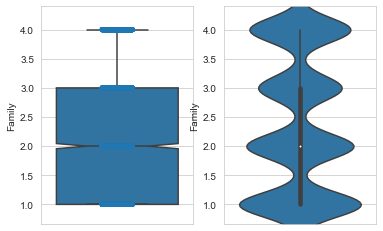

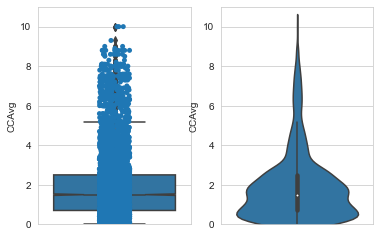

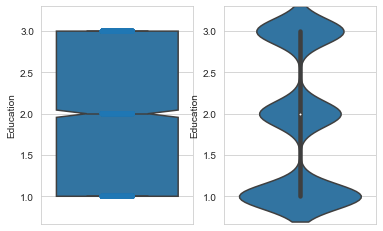

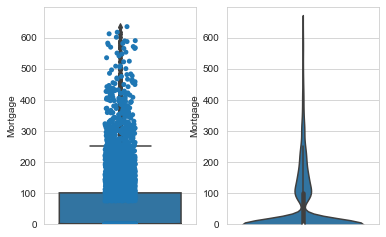

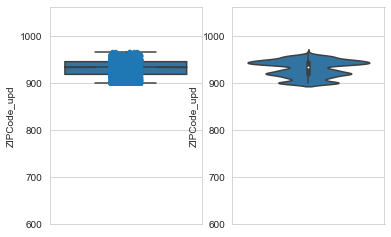

In [631]:
#Distributions for general customers

data_num = pd.DataFrame()
for n in DOI.columns:
    if np.max(DOI[n])>1:
        data_num[n] = DOI[n]

for n in data_num.columns:
    sns.set_style('whitegrid')
    fig, axes = plt.subplots(1, 2)
    _ylim = (min(data_num[n].values)/1.5,max(data_num[n].values)*1.1)
    plt.setp(axes, ylim=_ylim)
    sns.boxplot(y = data_num[n],notch=True,ax = axes[0])
    sns.stripplot(y = data_num[n],ax=axes[0])
    sns.violinplot(y= data_num[n],ax=axes[1])
    plt.show()

Below we perform multivariate analysis to further visually assess relations between the variables.

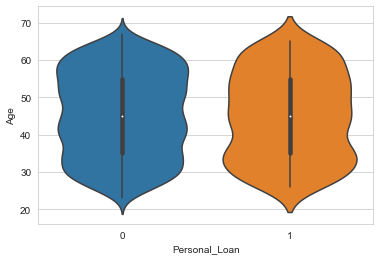

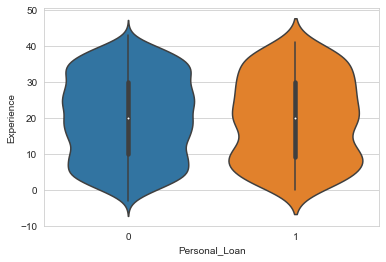

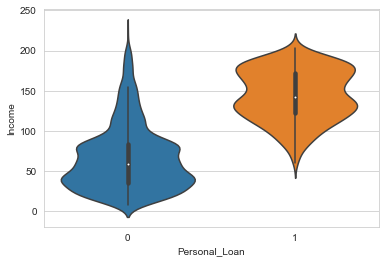

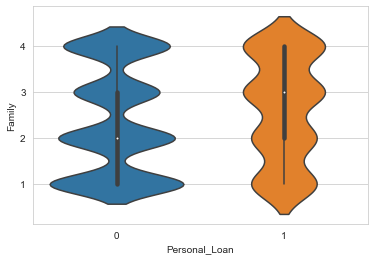

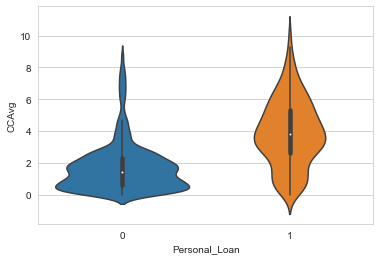

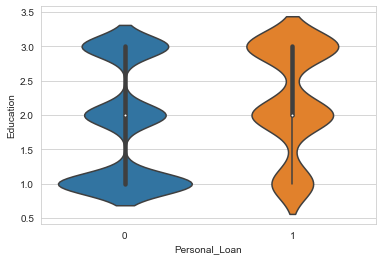

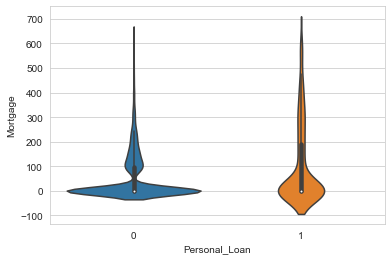

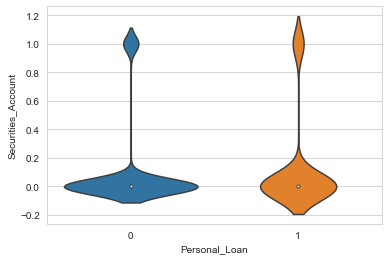

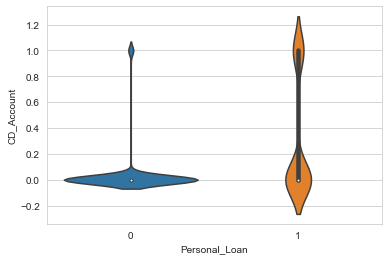

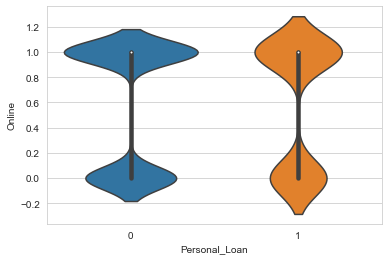

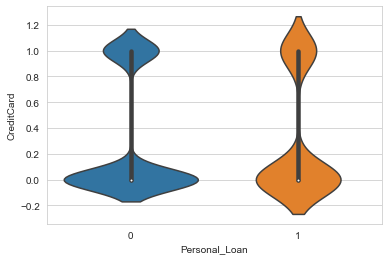

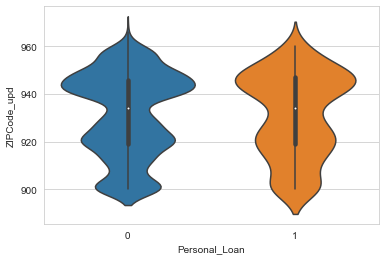

In [632]:
for t in DOI.drop(columns='Personal_Loan').columns:
    sns.violinplot(data=DOI,x='Personal_Loan',y=t)
    plt.show()

Comparing the data between general customers versus customers who accepted the offer we see clear differences in the distribution. While age and experience seem to be fairly irrelevant, we can see that the income distribution for people who accepted the offer is substantially higher (IQR = [125 - 175]) than for the general customer (IQR = [50 - 100]). Furthemore there seems to be a slight shift towards larger families (3-4 members) in customers that accepted. In an expected fashion, customers that accepted the offer also incurred in higher credit card spending (~4k/mo) versus the general customer (~1.5k/mo).

Looking at these distributions, it would seem that the variables that will be least impactful/informative to the model will be:
- Age 
- Experience

All other variables seem to be valuable predictive variables.

Furthermore, we can observe that there is no concern regarding outliers that would affect our model.

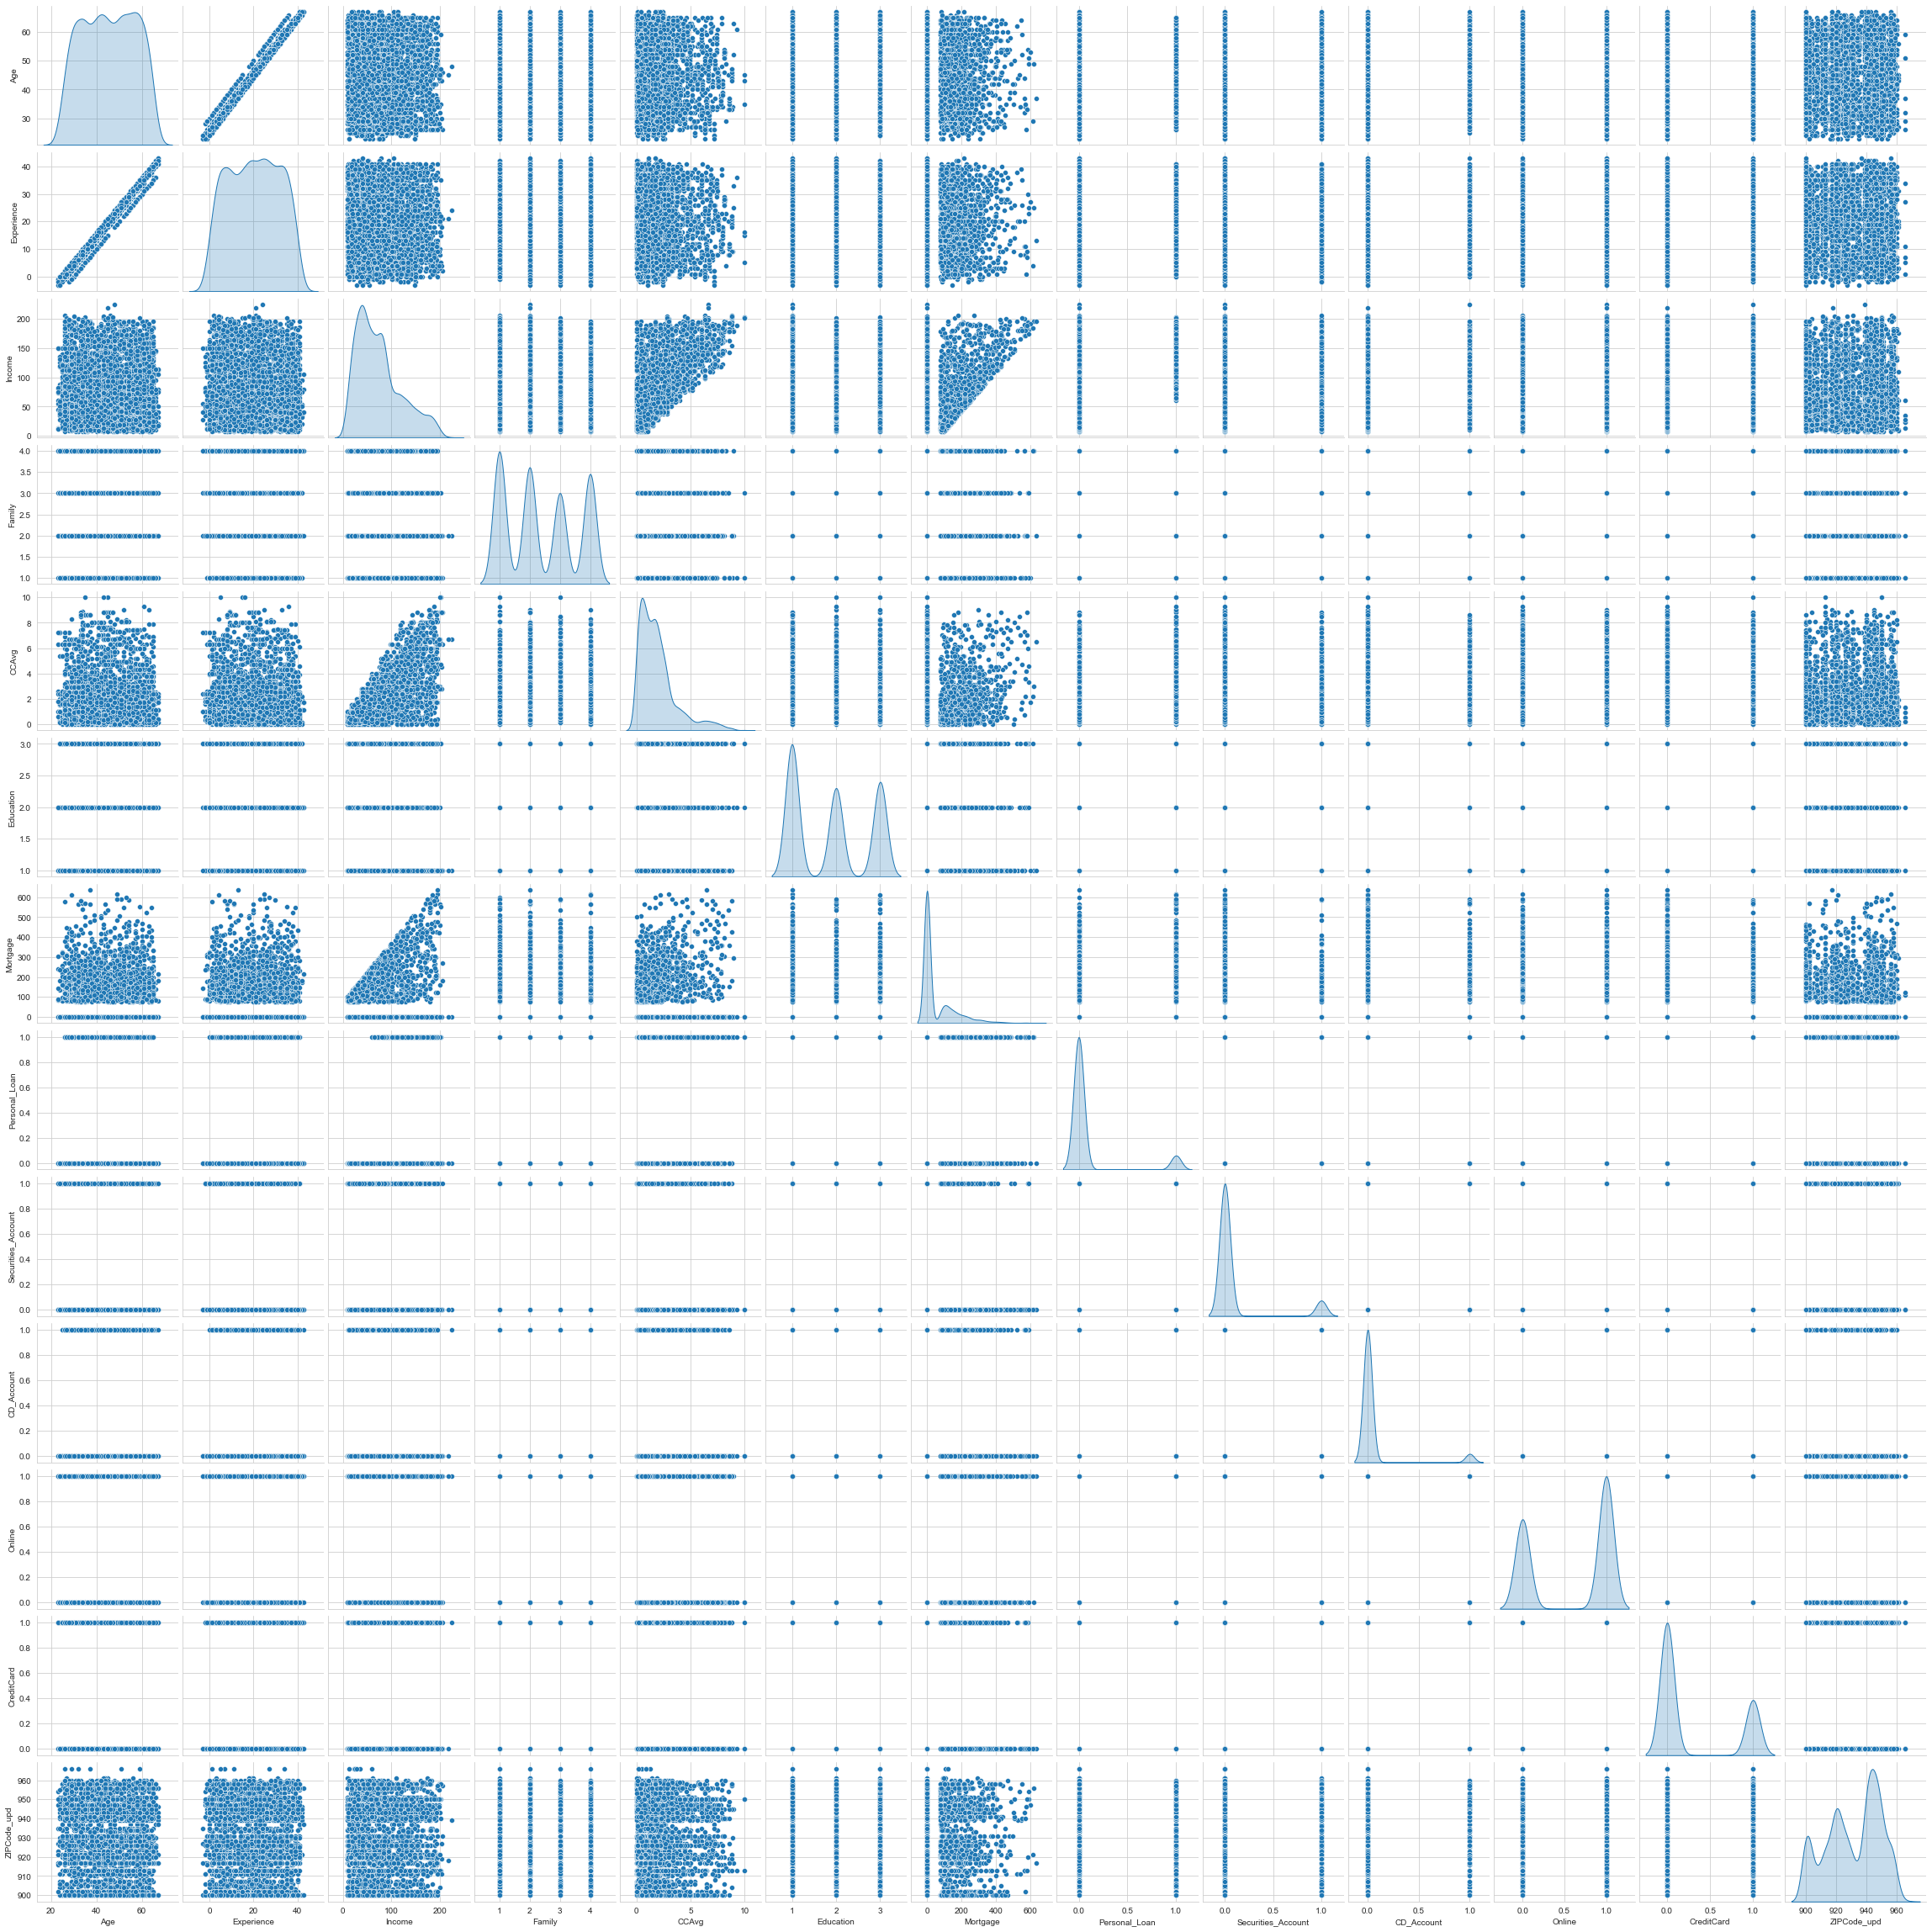

In [633]:
sns.pairplot(DOI,diag_kind='kde')

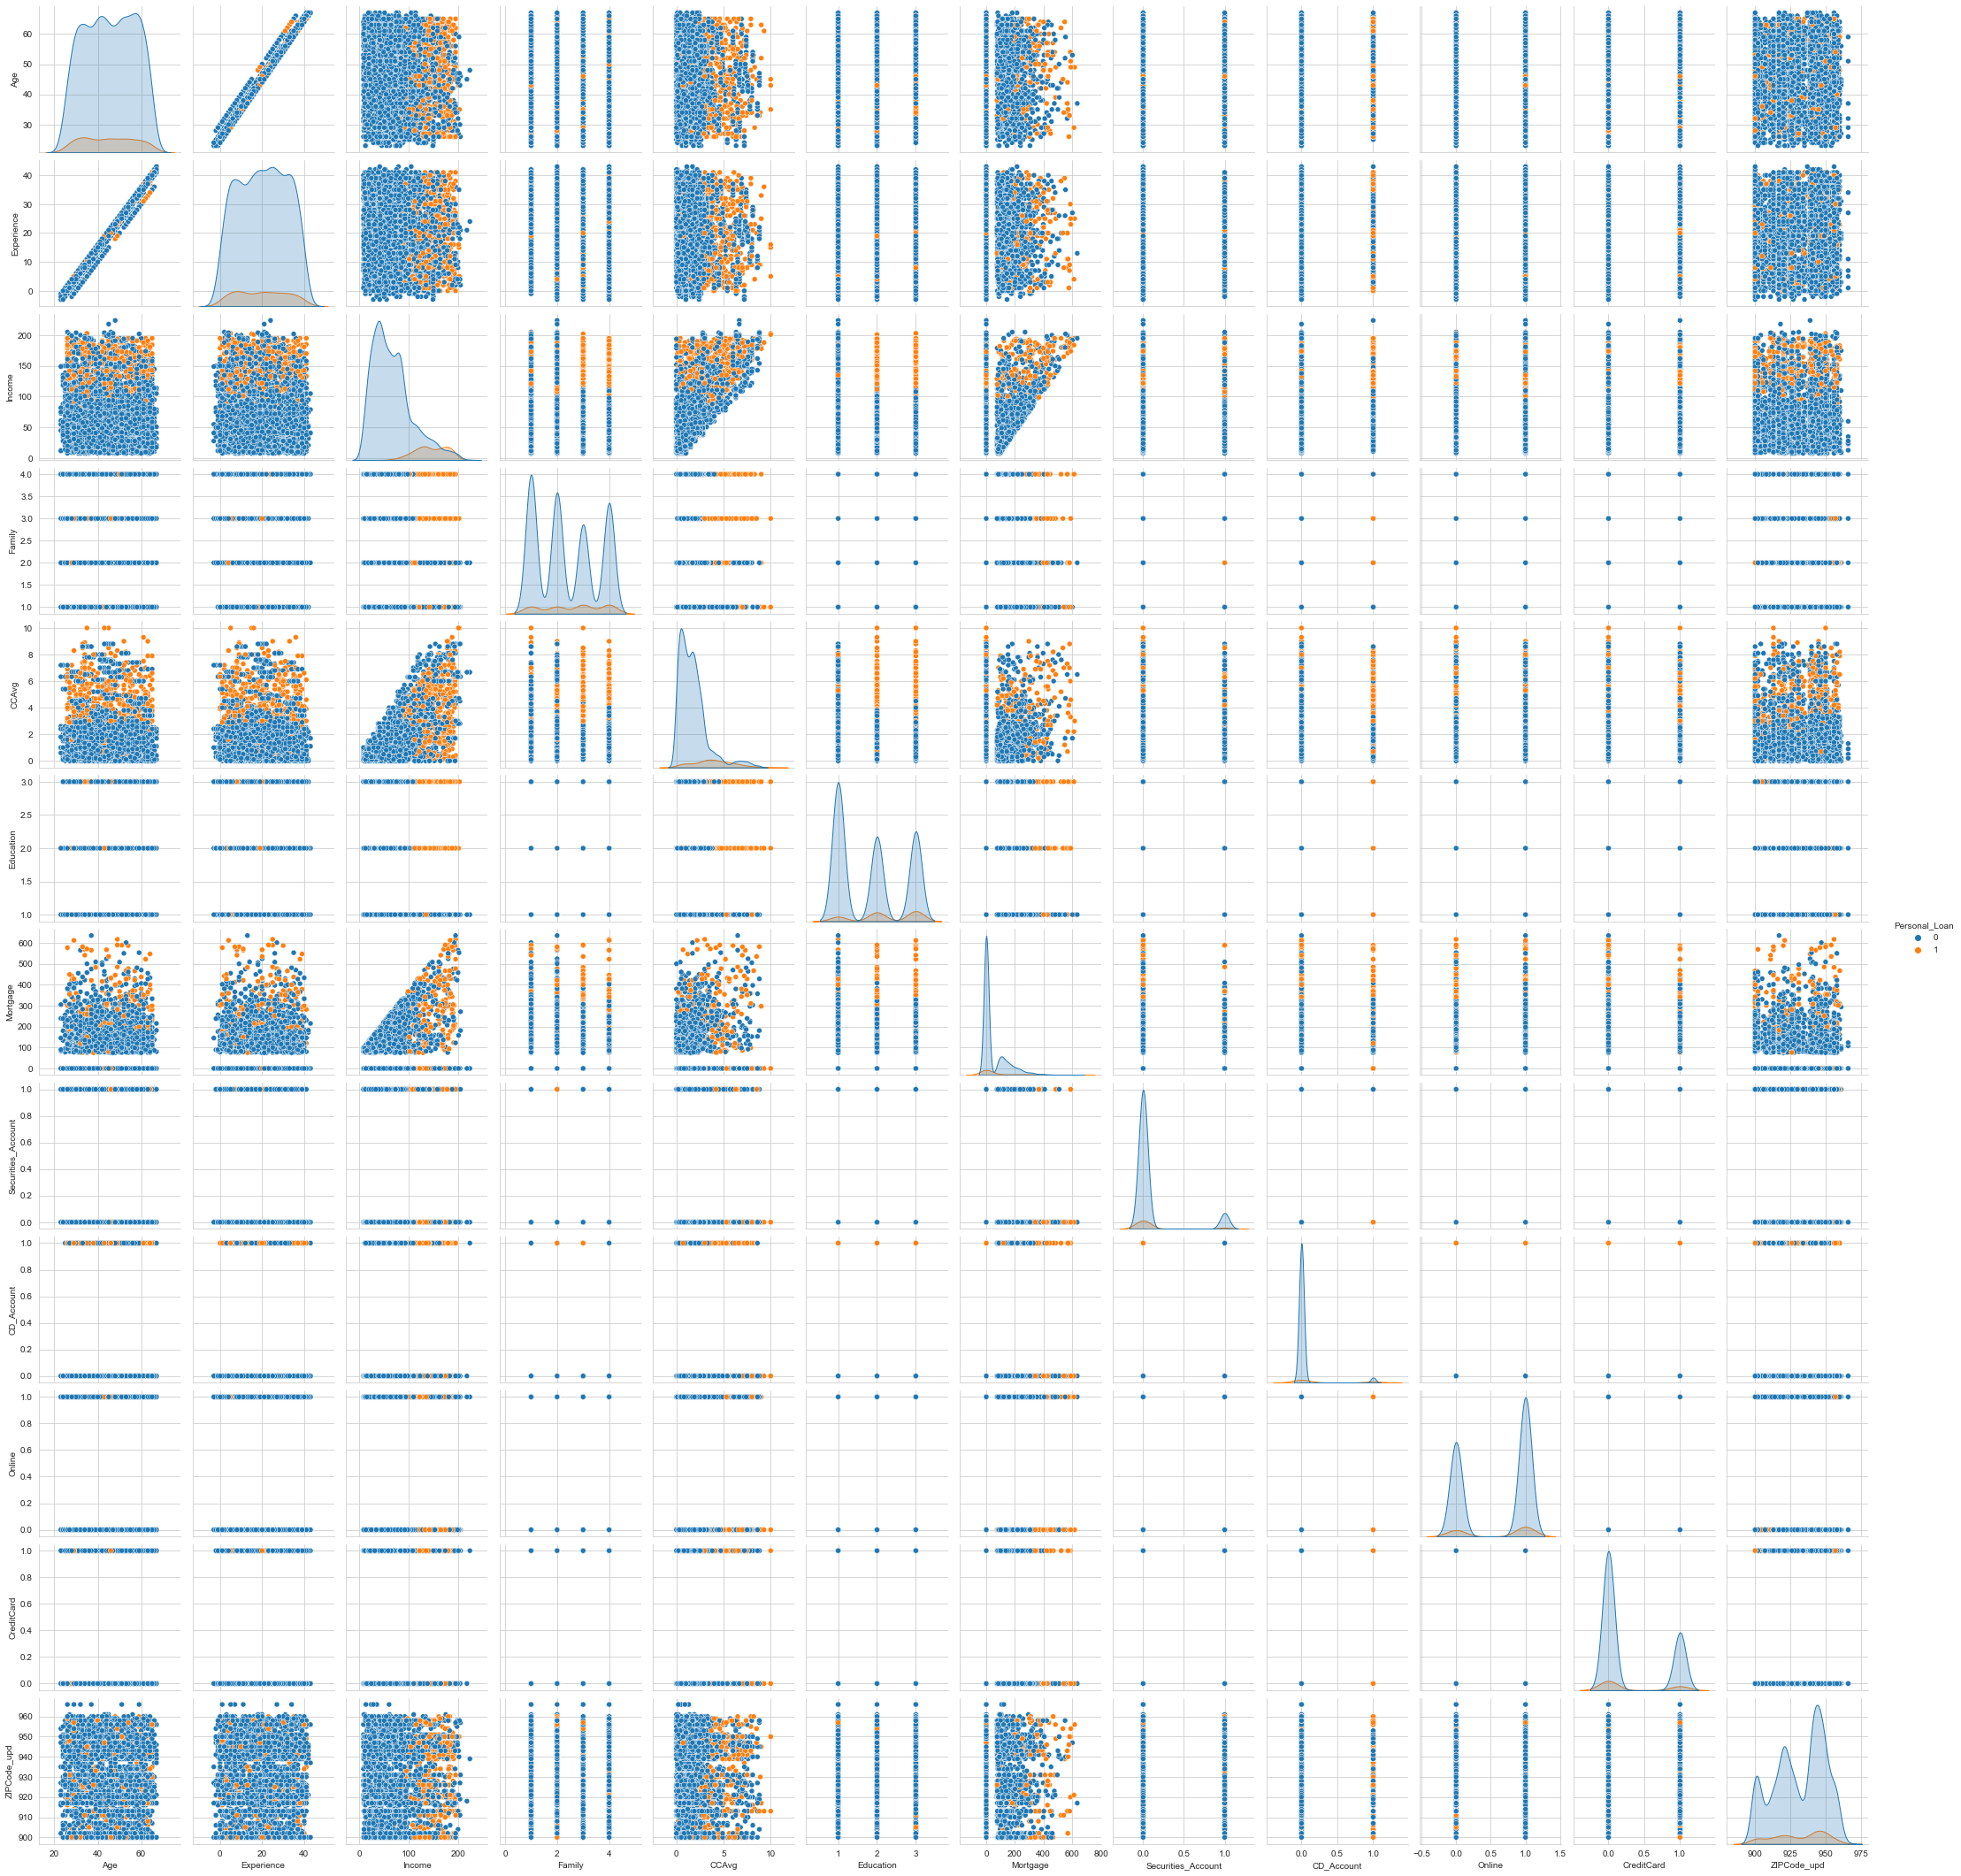

In [634]:
sns.pairplot(DOI,diag_kind='kde',hue='Personal_Loan')

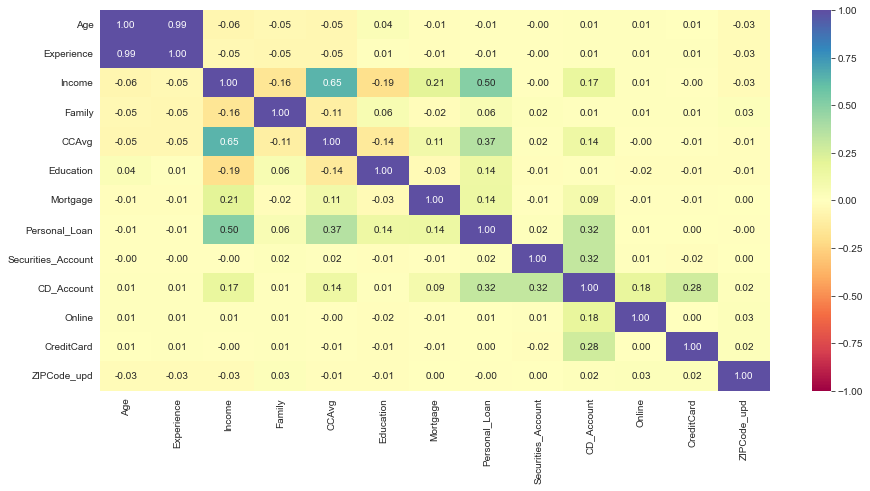

In [635]:
plt.figure(figsize=(15, 7))
sns.heatmap(DOI.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

We can notice two points for concern:
- Age and Experience are extremely correlated, so we should remove one. Given that Experience innapropriately contains negative values, dropping that one makes the most sense
- We also can see that mortgage shows signs of strong skew which then calls for transformation
- Given that so many variables are between 0 and 1, scaling the others would be highly recommended
- ZIPCodes seem to cluster around three main peaks so aggregation of these would extremely reduce cardinality and allow for One-Hot encoding

In [636]:
# Dropping Experience
DOI.drop(columns='Experience', inplace=True)

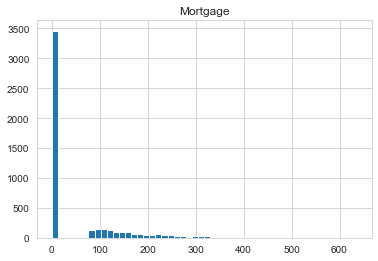

3462


In [637]:
# Determining transformation for variable "Mortgage"
plt.hist(DOI['Mortgage'],bins=50)
plt.title('Mortgage')
plt.show()

print(np.sum(DOI['Mortgage'] <= 0))

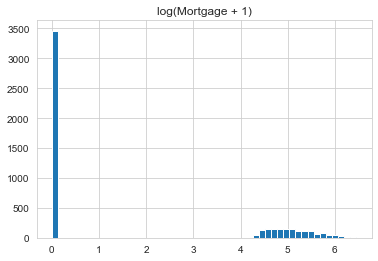

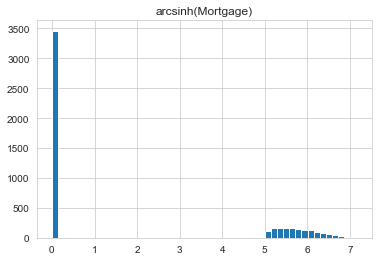

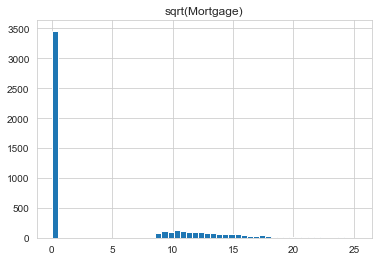

In [638]:
plt.hist(np.log(DOI['Mortgage'] + 1), 50)
plt.title('log(Mortgage + 1)')
plt.show()
plt.hist(np.arcsinh(DOI['Mortgage']), 50)
plt.title('arcsinh(Mortgage)')
plt.show()
plt.hist(np.sqrt(DOI['Mortgage']), 50)
plt.title('sqrt(Mortgage)')
plt.show()

In [639]:
DOI['Mortgage_log'] = np.log(DOI['Mortgage'] + 1)
DOI.drop('Mortgage', axis=1, inplace=True)

[900 902 903 904 905 906 907 908 910 911 912 913 914 916 917 918 919 920
 921 922 923 924 925 926 927 928 930 931 933 934 935 936 937 939 940 941
 942 943 944 945 946 947 948 949 950 951 952 953 954 955 956 957 958 959
 960 961 966]


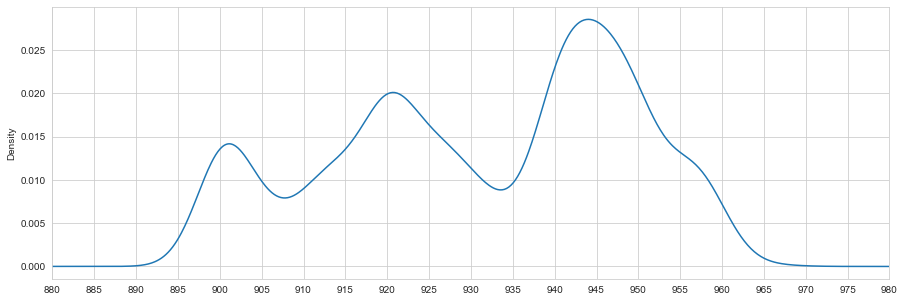

In [640]:
# Reducing dimensionality of ZIP Code variable
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.xlim(880,980)
plt.locator_params(axis='x', nbins=20)
ZIPCode_original.plot.kde()

zipcodes = ZIPCode_original.unique()
print(np.sort(zipcodes))


In [641]:
binned_zc = pd.cut(DOI['ZIPCode_upd'], [-np.inf, 908, 934, np.inf],
labels = ["900-908", "910-934", "935-966"])
binned_zc

0       910-934
1       900-908
2       935-966
3       935-966
4       910-934
         ...   
4995    910-934
4996    910-934
4997    910-934
4998    900-908
4999    910-934
Name: ZIPCode_upd, Length: 5000, dtype: category
Categories (3, object): ['900-908' < '910-934' < '935-966']

In [642]:
DOI['ZIPCode_bin'] = binned_zc
DOI.drop(['ZIPCode_upd'], axis=1, inplace=True)
DOI['ZIPCode_bin'].value_counts(dropna=False)

935-966    2491
910-934    1806
900-908     703
Name: ZIPCode_bin, dtype: int64

In [643]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.ylim(0.8,1)
    plt.show()

In [644]:
DOI.head()

Age  Income  Family  CCAvg  Education  Personal_Loan  Securities_Account  \
0   25      49       4    1.6          1              0                   1   
1   45      34       3    1.5          1              0                   1   
2   39      11       1    1.0          1              0                   0   
3   35     100       1    2.7          2              0                   0   
4   35      45       4    1.0          2              0                   0   

   CD_Account  Online  CreditCard  Mortgage_log ZIPCode_bin  
0           0       0           0           0.0     910-934  
1           0       0           0           0.0     900-908  
2           0       0           0           0.0     935-966  
3           0       0           0           0.0     935-966  
4           0       0           1           0.0     910-934

Personal_Loan     0    1   All
ZIPCode_bin                   
All            4520  480  5000
935-966        2253  238  2491
910-934        1631  175  1806
900-908         636   67   703
------------------------------------------------------------------------------------------------------------------------


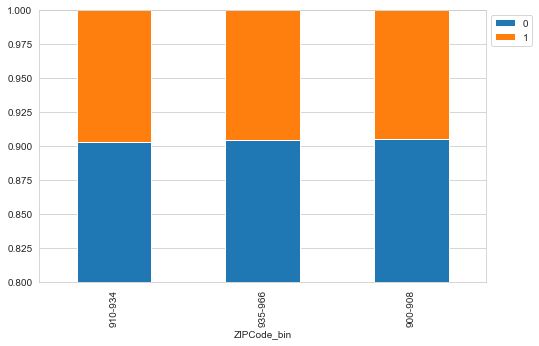

In [645]:
stacked_barplot(DOI, "ZIPCode_bin", "Personal_Loan")


Because of the categorical nature of this variable, one-hot encoding would normally be necessary to run our logistic regression. However, we can observe that this variable contains very little information, so this variable is likely to be removed during model performance evaluation. 

At this point, the data is ready for a decision tree model. However, to start with our logistic regression model, we will copy our DOI dataframe and optimize for a logistic regression.

# Logistic Regression

In [646]:
DOI_LR = DOI.copy()

In [647]:
DOI_LR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Income              5000 non-null   int64   
 2   Family              5000 non-null   int64   
 3   CCAvg               5000 non-null   float64 
 4   Education           5000 non-null   int64   
 5   Personal_Loan       5000 non-null   int64   
 6   Securities_Account  5000 non-null   int64   
 7   CD_Account          5000 non-null   int64   
 8   Online              5000 non-null   int64   
 9   CreditCard          5000 non-null   int64   
 10  Mortgage_log        5000 non-null   float64 
 11  ZIPCode_bin         5000 non-null   category
dtypes: category(1), float64(2), int64(9)
memory usage: 434.8 KB


In [648]:
OHE_cols = pd.get_dummies(DOI_LR['ZIPCode_bin'],drop_first=False)#.drop(columns='ZIPCode_bin',inplace=True)

DOI_LR = pd.concat([DOI_LR, OHE_cols],1).reset_index(drop=True)
DOI_LR.drop(columns=['ZIPCode_bin'], axis=1, inplace=True)

DOI_LR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   Family              5000 non-null   int64  
 3   CCAvg               5000 non-null   float64
 4   Education           5000 non-null   int64  
 5   Personal_Loan       5000 non-null   int64  
 6   Securities_Account  5000 non-null   int64  
 7   CD_Account          5000 non-null   int64  
 8   Online              5000 non-null   int64  
 9   CreditCard          5000 non-null   int64  
 10  Mortgage_log        5000 non-null   float64
 11  900-908             5000 non-null   uint8  
 12  910-934             5000 non-null   uint8  
 13  935-966             5000 non-null   uint8  
dtypes: float64(2), int64(9), uint8(3)
memory usage: 444.5 KB


At this point, our dataframe is ready for logistic modeling:

In [649]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


In [650]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()
    
    percentages = np.asarray([100*item / cm.flatten().sum() for item in cm.flatten()])
    perc_dict = {
        'True Negative':[percentages[0]],
        'False Negative':[percentages[1]],
        'False Positive':[percentages[2]],
        'True Positive':[percentages[3]]
                }

    return pd.DataFrame.from_dict(perc_dict)

### Building the model

We are developing a model that uses the independent variables to determine predictors for whether a client would accept the a personal loan offer or not.

Shape of Training set :  (3500, 13)
Shape of test set :  (1500, 13)
Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64

The performance parameters for training set are:


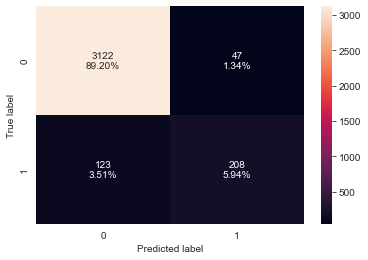

Training performance:


Accuracy    Recall  Precision        F1
0  0.951429  0.628399   0.815686  0.709898

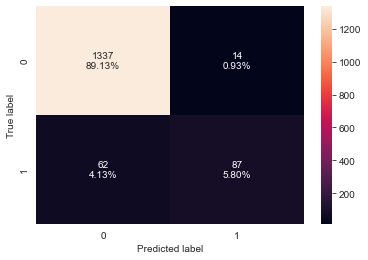

Test set performance:


Accuracy    Recall  Precision     F1
0  0.949333  0.583893   0.861386  0.696

In [651]:
X = DOI_LR.drop(["Personal_Loan"], axis=1)
Y = DOI_LR["Personal_Loan"]


# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# As a sanity check it is good to check for a proper separation of training and testing sets for the independent 
# variables. Similarly, for a logistic regression it is advantageous to make sure that your ratios between success/fail
# are approximately the same as to not bias the training.
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))
print()
lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)
print("The performance parameters for training set are:")
# creating confusion matrix checking model performance on training set
confusion_train_df_1 = confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

log_reg_model_train_perf_1 = model_performance_classification_sklearn_with_threshold(lg, X_train, y_train)

print("Training performance:")
display(log_reg_model_train_perf_1)
print()
# creating confusion matrix checking model performance on test set
confusion_test_df_1 = confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

log_reg_model_test_perf_1 = model_performance_classification_sklearn_with_threshold(lg, X_test, y_test)

print("Test set performance:")
display(log_reg_model_test_perf_1)



## Concerns:

- Our current model would be able to predict only ~6% of the customers, which is less than the 9% success rate of the last year's campaign. 
- Another point of concern, false negative error for both training and testing sets is the highest error type. This means that clients that would have taken the offer would have not been targeted, likely losing their business.

Therefore, we should be attempting to increase F1_score value


## Model Performance Improvement through further data engineering

The performance parameters for training set are:


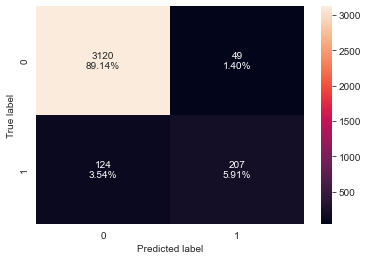

Training performance:


Accuracy    Recall  Precision        F1
0  0.950571  0.625378   0.808594  0.705281


The performance parameters for testing set are:


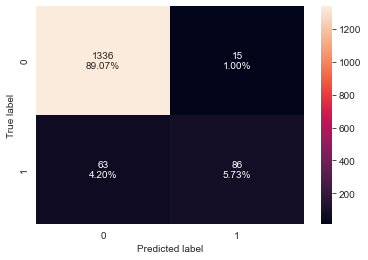

Test set performance:


Accuracy    Recall  Precision     F1
0     0.948  0.577181   0.851485  0.688

In [652]:
#Reducing cardinality by removing variables that don't seem to contribute contribute a lot: Age and ZIP Code
DOI_LR_2 = DOI_LR.drop(["900-908","910-934","935-966","Age"], axis=1).copy()
X_2 = DOI_LR_2.drop(["Personal_Loan"], axis=1)
Y_2 = DOI_LR_2["Personal_Loan"]


# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_2, Y_2, test_size=0.30, random_state=1)

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

# creating confusion matrix for training set
print("The performance parameters for training set are:")
confusion_train_df_2 = confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

log_reg_model_train_perf_2 = model_performance_classification_sklearn_with_threshold(lg, X_train, y_train)

print("Training performance:")
display(log_reg_model_train_perf_2)
print()
# creating confusion matrix testing set
print("The performance parameters for testing set are:")
confusion_test_df_2 = confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

log_reg_model_test_perf_2 = model_performance_classification_sklearn_with_threshold(lg, X_test, y_test)

print("Test set performance:")
display(log_reg_model_test_perf_2)

Removing those variables, marginally negatively affects performance parameters

In [653]:
# Attempting to improve performance by including number of accounts per customer as a variable

In [654]:
customer = customer.rename(columns={"CCAvg": "CC_Account", "Mortgage": "Mortgage_Account"})
customer['Number of Accounts']=np.sum(customer[['CC_Account','Mortgage_Account','Securities_Account','CD_Account']],axis=1)
customer.sample(10)

CC_Account  Mortgage_Account  Securities_Account  CD_Account  \
3108         1.0                 0                   0           0   
46           1.0                 1                   0           0   
1847         1.0                 1                   0           0   
3861         1.0                 0                   0           0   
4464         1.0                 1                   0           0   
891          1.0                 1                   0           1   
1473         1.0                 0                   0           0   
1326         1.0                 0                   1           0   
410          1.0                 0                   0           0   
1828         1.0                 0                   0           0   

      Number of Accounts  
3108                 1.0  
46                   2.0  
1847                 2.0  
3861                 1.0  
4464                 2.0  
891                  3.0  
1473                 1.0  
1326                 2.0  
410                  1.0  
1828                 1.0

The performance parameters for training set are:


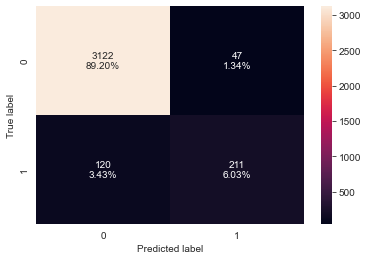

Training performance:


Accuracy    Recall  Precision        F1
0  0.952286  0.637462   0.817829  0.716469


The performance parameters for testing set are:


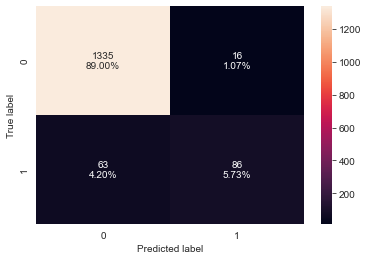

Test set performance:


Accuracy    Recall  Precision        F1
0  0.947333  0.577181   0.843137  0.685259

In [655]:
#Attempting to increase performance by including customer type categorical:
DOI_LR_3 = DOI_LR.copy()
DOI_LR_3['Number of Accounts'] = customer['Number of Accounts']

X_3 = DOI_LR_3.drop(["Personal_Loan"], axis=1)
Y_3 = DOI_LR_3["Personal_Loan"]


# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_3, Y_3, test_size=0.30, random_state=1)

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

# creating confusion matrix for training set
print("The performance parameters for training set are:")
confusion_train_df_3 = confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

log_reg_model_train_perf_3 = model_performance_classification_sklearn_with_threshold(lg, X_train, y_train)

print("Training performance:")
display(log_reg_model_train_perf_3)
print()
# creating confusion matrix testing set
print("The performance parameters for testing set are:")
confusion_test_df_3 = confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

log_reg_model_test_perf_3 = model_performance_classification_sklearn_with_threshold(lg, X_test, y_test)

print("Test set performance:")
display(log_reg_model_test_perf_3)

In [656]:
DOI_LR.head()

Age  Income  Family  CCAvg  Education  Personal_Loan  Securities_Account  \
0   25      49       4    1.6          1              0                   1   
1   45      34       3    1.5          1              0                   1   
2   39      11       1    1.0          1              0                   0   
3   35     100       1    2.7          2              0                   0   
4   35      45       4    1.0          2              0                   0   

   CD_Account  Online  CreditCard  Mortgage_log  900-908  910-934  935-966  
0           0       0           0           0.0        0        1        0  
1           0       0           0           0.0        1        0        0  
2           0       0           0           0.0        0        0        1  
3           0       0           0           0.0        0        0        1  
4           0       0           1           0.0        0        1        0

In [657]:
customer.head()

CC_Account  Mortgage_Account  Securities_Account  CD_Account  \
0         1.0                 0                   1           0   
1         1.0                 0                   1           0   
2         1.0                 0                   0           0   
3         1.0                 0                   0           0   
4         1.0                 0                   0           0   

   Number of Accounts  
0                 2.0  
1                 2.0  
2                 1.0  
3                 1.0  
4                 1.0

The performance parameters for training set are:


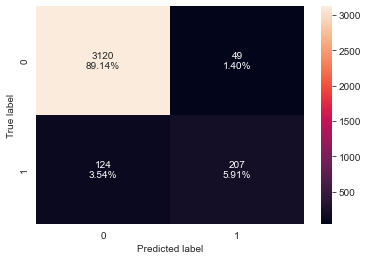

Training performance:


Accuracy    Recall  Precision        F1
0  0.950571  0.625378   0.808594  0.705281


The performance parameters for testing set are:


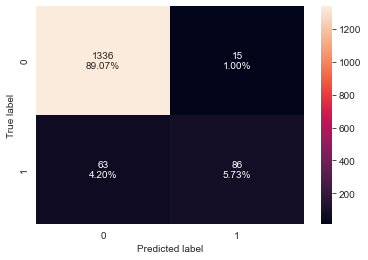

Test set performance:


Accuracy    Recall  Precision     F1
0     0.948  0.577181   0.851485  0.688

In [658]:
#Attempting to increase performance by including customer type using individual binary :
DOI_LR_4 = pd.concat([DOI_LR, customer[['CC_Account','Mortgage_Account']]],1).reset_index(drop=True)


X_4 = DOI_LR_4.drop(["Personal_Loan"], axis=1)
Y_4 = DOI_LR_4["Personal_Loan"]


# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_2, Y_2, test_size=0.30, random_state=1)

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

# creating confusion matrix for training set
print("The performance parameters for training set are:")
confusion_train_df_4 = confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

log_reg_model_train_perf_4 = model_performance_classification_sklearn_with_threshold(lg, X_train, y_train)

print("Training performance:")
display(log_reg_model_train_perf_4)
print()
# creating confusion matrix testing set
print("The performance parameters for testing set are:")
confusion_test_df_4 = confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

log_reg_model_test_perf_4 = model_performance_classification_sklearn_with_threshold(lg, X_test, y_test)

print("Test set performance:")
display(log_reg_model_test_perf_4)

The performance parameters for training set are:


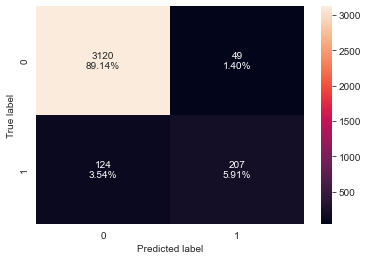

Training performance:


Accuracy    Recall  Precision        F1
0  0.950571  0.625378   0.808594  0.705281


The performance parameters for testing set are:


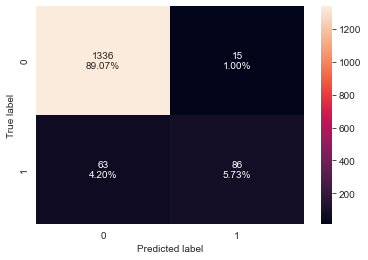

Test set performance:


Accuracy    Recall  Precision     F1
0     0.948  0.577181   0.851485  0.688

In [659]:
#Attempting to increase performance by including customer type using individual binary :
DOI_LR_5 = pd.concat([DOI_LR, customer[['CC_Account','Mortgage_Account','Number of Accounts']]],1).reset_index(drop=True)


X_5 = DOI_LR_5.drop(["Personal_Loan"], axis=1)
Y_5 = DOI_LR_5["Personal_Loan"]


# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_2, Y_2, test_size=0.30, random_state=1)

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

# creating confusion matrix for training set
print("The performance parameters for training set are:")
confusion_train_df_5 = confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

log_reg_model_train_perf_5 = model_performance_classification_sklearn_with_threshold(lg, X_train, y_train)

print("Training performance:")
display(log_reg_model_train_perf_5)
print()
# creating confusion matrix testing set
print("The performance parameters for testing set are:")
confusion_test_df_5 = confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

log_reg_model_test_perf_5 = model_performance_classification_sklearn_with_threshold(lg, X_test, y_test)

print("Test set performance:")
display(log_reg_model_test_perf_5)

## Summary of first round of model performance improvement

In [660]:

print('Performance summary for training set')
conf_train_frames = [confusion_train_df_1, confusion_train_df_2, confusion_train_df_3, confusion_train_df_4, confusion_train_df_5]
confusion_training = pd.concat(conf_train_frames).reset_index(drop=True)

perf_train_frames = [log_reg_model_train_perf_1, log_reg_model_train_perf_2, log_reg_model_train_perf_3, log_reg_model_train_perf_4, log_reg_model_train_perf_5]
performance_training = pd.concat(perf_train_frames).reset_index(drop=True)

display(confusion_training)
display(performance_training)


log_reg_model_test_perf_5
print('Performance summary for testing set')
conf_test_frames = [confusion_test_df_1, confusion_test_df_2, confusion_test_df_3, confusion_test_df_4, confusion_test_df_5]
confusion_testing = pd.concat(conf_test_frames).reset_index(drop=True)

perf_test_frames = [log_reg_model_test_perf_1, log_reg_model_test_perf_2, log_reg_model_test_perf_3, log_reg_model_test_perf_4, log_reg_model_test_perf_5]
performance_testing = pd.concat(perf_test_frames).reset_index(drop=True)

display(confusion_testing)
display(performance_testing)

Performance summary for training set


True Negative  False Negative  False Positive  True Positive
0      89.200000        1.342857        3.514286       5.942857
1      89.142857        1.400000        3.542857       5.914286
2      89.200000        1.342857        3.428571       6.028571
3      89.142857        1.400000        3.542857       5.914286
4      89.142857        1.400000        3.542857       5.914286

Accuracy    Recall  Precision        F1
0  0.951429  0.628399   0.815686  0.709898
1  0.950571  0.625378   0.808594  0.705281
2  0.952286  0.637462   0.817829  0.716469
3  0.950571  0.625378   0.808594  0.705281
4  0.950571  0.625378   0.808594  0.705281

Performance summary for testing set


True Negative  False Negative  False Positive  True Positive
0      89.133333        0.933333        4.133333       5.800000
1      89.066667        1.000000        4.200000       5.733333
2      89.000000        1.066667        4.200000       5.733333
3      89.066667        1.000000        4.200000       5.733333
4      89.066667        1.000000        4.200000       5.733333

Accuracy    Recall  Precision        F1
0  0.949333  0.583893   0.861386  0.696000
1  0.948000  0.577181   0.851485  0.688000
2  0.947333  0.577181   0.843137  0.685259
3  0.948000  0.577181   0.851485  0.688000
4  0.948000  0.577181   0.851485  0.688000

So it seems that the first dataframe gave the best fit performance.

We will use AUC-ROC curve to try and increase F1 performance

In [661]:
# Resetting training and testing sets to the best performing dataframe

X = DOI_LR.drop(["Personal_Loan"], axis=1)
Y = DOI_LR["Personal_Loan"]

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)


### ROC-AUC on training set

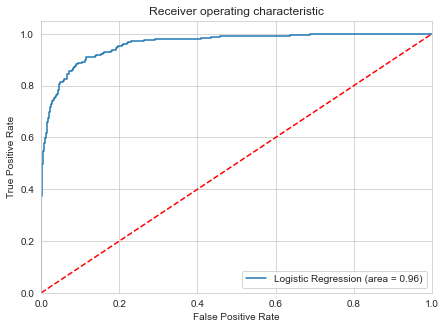

In [662]:
# Find the roc auc score for training data
logit_roc_auc_train = roc_auc_score(
    y_train, lg.predict_proba(X_train)[:, 1]
)  # The indexing represents predicted probabilities for class 1
# Find fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
# Plot roc curve
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### ROC-AUC on testing set

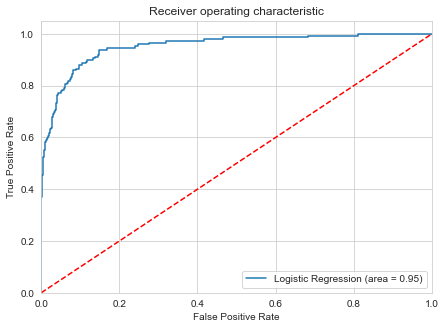

In [663]:
# Find the roc auc score for training data
logit_roc_auc_test = roc_auc_score(
    y_test, lg.predict_proba(X_test)[:, 1]
)  # The indexing represents predicted probabilities for class 1
# Find fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
# Plot roc curve
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Model Performance Improvement
##### Optimal threshold using AUC-ROC curve

Optimal thresold is the value that best separated the True positive rate and False positive rate. 



In [664]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
# roc_curve returns the fpr, tpr and threshold values which takes the original data and predicted probabilities for the class 1.
fpr, tpr, thresholds = roc_curve(
    y_train, lg.predict_proba(X_train)[:, 1]
)  # The indexing represents predicted probabilities for class 1

optimal_idx = np.argmax(
    tpr - fpr
)  # Finds the index that contains the max difference between tpr and fpr
optimal_threshold_auc_roc = thresholds[
    optimal_idx
]  # stores the optimal threshold value
print(optimal_threshold_auc_roc)

0.11517550001365595


Performance parameters on training set with optimized threshold


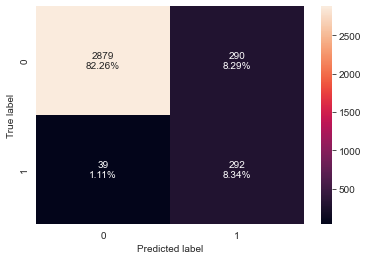

Training performance:


Accuracy    Recall  Precision       F1
0     0.906  0.882175   0.501718  0.63965

In [665]:
print('Performance parameters on training set with optimized threshold')
# creating confusion matrix
confusion_matrix_train_opt = confusion_matrix_sklearn_with_threshold(lg, X_train, y_train, threshold=optimal_threshold_auc_roc)

# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(lg, X_train, y_train, threshold=optimal_threshold_auc_roc)
print("Training performance:")
display(log_reg_model_train_perf_threshold_auc_roc)

Performance parameters on testing set with optimized threshold


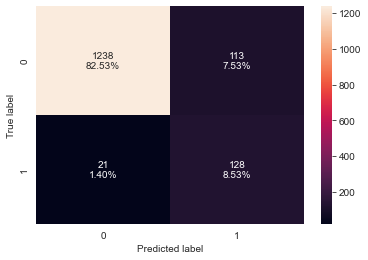

Testing set performance:


Accuracy   Recall  Precision       F1
0  0.910667  0.85906    0.53112  0.65641

In [666]:
print('Performance parameters on testing set with optimized threshold')
# creating confusion matrix
confusion_matrix_test_opt = confusion_matrix_sklearn_with_threshold(lg, X_test, y_test, threshold=optimal_threshold_auc_roc)

# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(lg, X_test, y_test, threshold=optimal_threshold_auc_roc)
print("Testing set performance:")
display(log_reg_model_test_perf_threshold_auc_roc)

This threshold results in a large increase in Recall value, with a notable decrease in Precision (resulting in an overall decrease of F1 parameter). This might be highly advantageous since it might be better to capture as many of the true positives as possible, at the cost of targetting more customers that are unlikely to take the offer depending on what the cost would be for including these customers in the campaign.

We can still try to obtain a better threshold:

#### Using Precision-Recall curve and see if we can find a better threshold

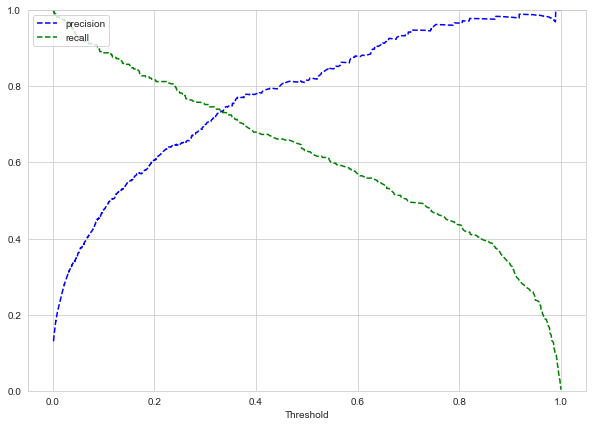

[0.33398609]


In [667]:
# Find the predicted probabilities for class 1
y_scores = lg.predict_proba(X_train)[:, 1]
# Find fpr, tpr and threshold values
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    plt.show()

    return thresholds[np.where(precisions==recalls)]


plt.figure(figsize=(10, 7))
# Plot recall precision curve
optimal_threshold_curve = plot_prec_recall_vs_tresh(prec, rec, tre)

print(optimal_threshold_curve)

Performance parameters on training set with optimized threshold


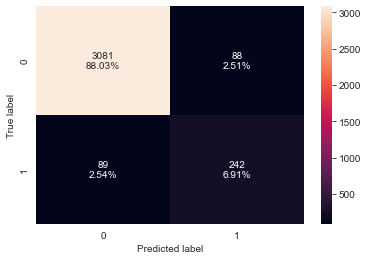

Training performance:


Accuracy    Recall  Precision        F1
0  0.949429  0.731118   0.733333  0.732224

In [668]:
print('Performance parameters on training set with optimized threshold')
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train, threshold=optimal_threshold_curve)

log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(lg, X_train, y_train, threshold=optimal_threshold_curve)
print("Training performance:")
display(log_reg_model_train_perf_threshold_curve)

Performance parameters on testing set with optimized threshold


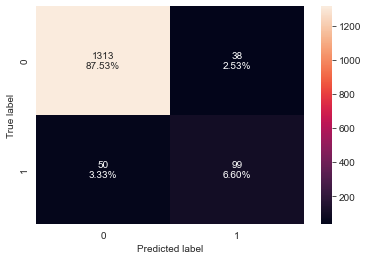

Testing set performance:


Accuracy   Recall  Precision        F1
0  0.941333  0.66443   0.722628  0.692308

In [669]:
print('Performance parameters on testing set with optimized threshold')
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test, threshold=optimal_threshold_curve)

log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(lg, X_test, y_test, threshold=optimal_threshold_curve)
print("Testing set performance:")
display(log_reg_model_test_perf_threshold_curve)

## Conclusion
 We can see that using the <b>optimal threshold as per AUC-ROC curve</b> to build our logistic regression model results in the maximum Recall value, while all our approaches show only marginal effect of the F1 parameter. Creating our predictive model for customers that would take the personal loan offer with this threshold would result in the highest number of likely candidates at the expense of targeting customers that are unlikely to take the offer.

# Decision Tree

We will first construct a decisiong tree with the best performing dataframe from our logistic regression model. The other DF's will be tested if performance suggests it would be beneficial

In [670]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [671]:
# Scoring this first resulting tree

print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.9786666666666667


In [672]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [673]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

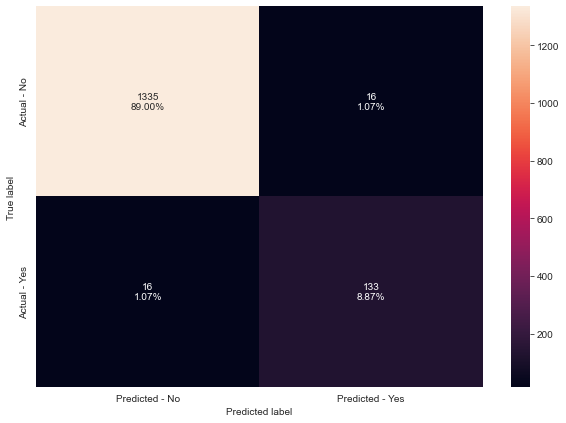

In [674]:
make_confusion_matrix(dTree,y_test)

In [675]:
# Recall on train and test
get_recall_score(dTree)

Recall on training set :  1.0
Recall on test set :  0.8926174496644296


We can see that for both the trainig and, more importantly, the testing set, the model has a really high accuracy. Furthermore, this approach of classification results in a high recall score, which means we are accurately predicting customers that would accept the personal loan offer.

#### Observing most important features

In [676]:
feature_names = list(X.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Mortgage_log', '900-908', '910-934', '935-966']


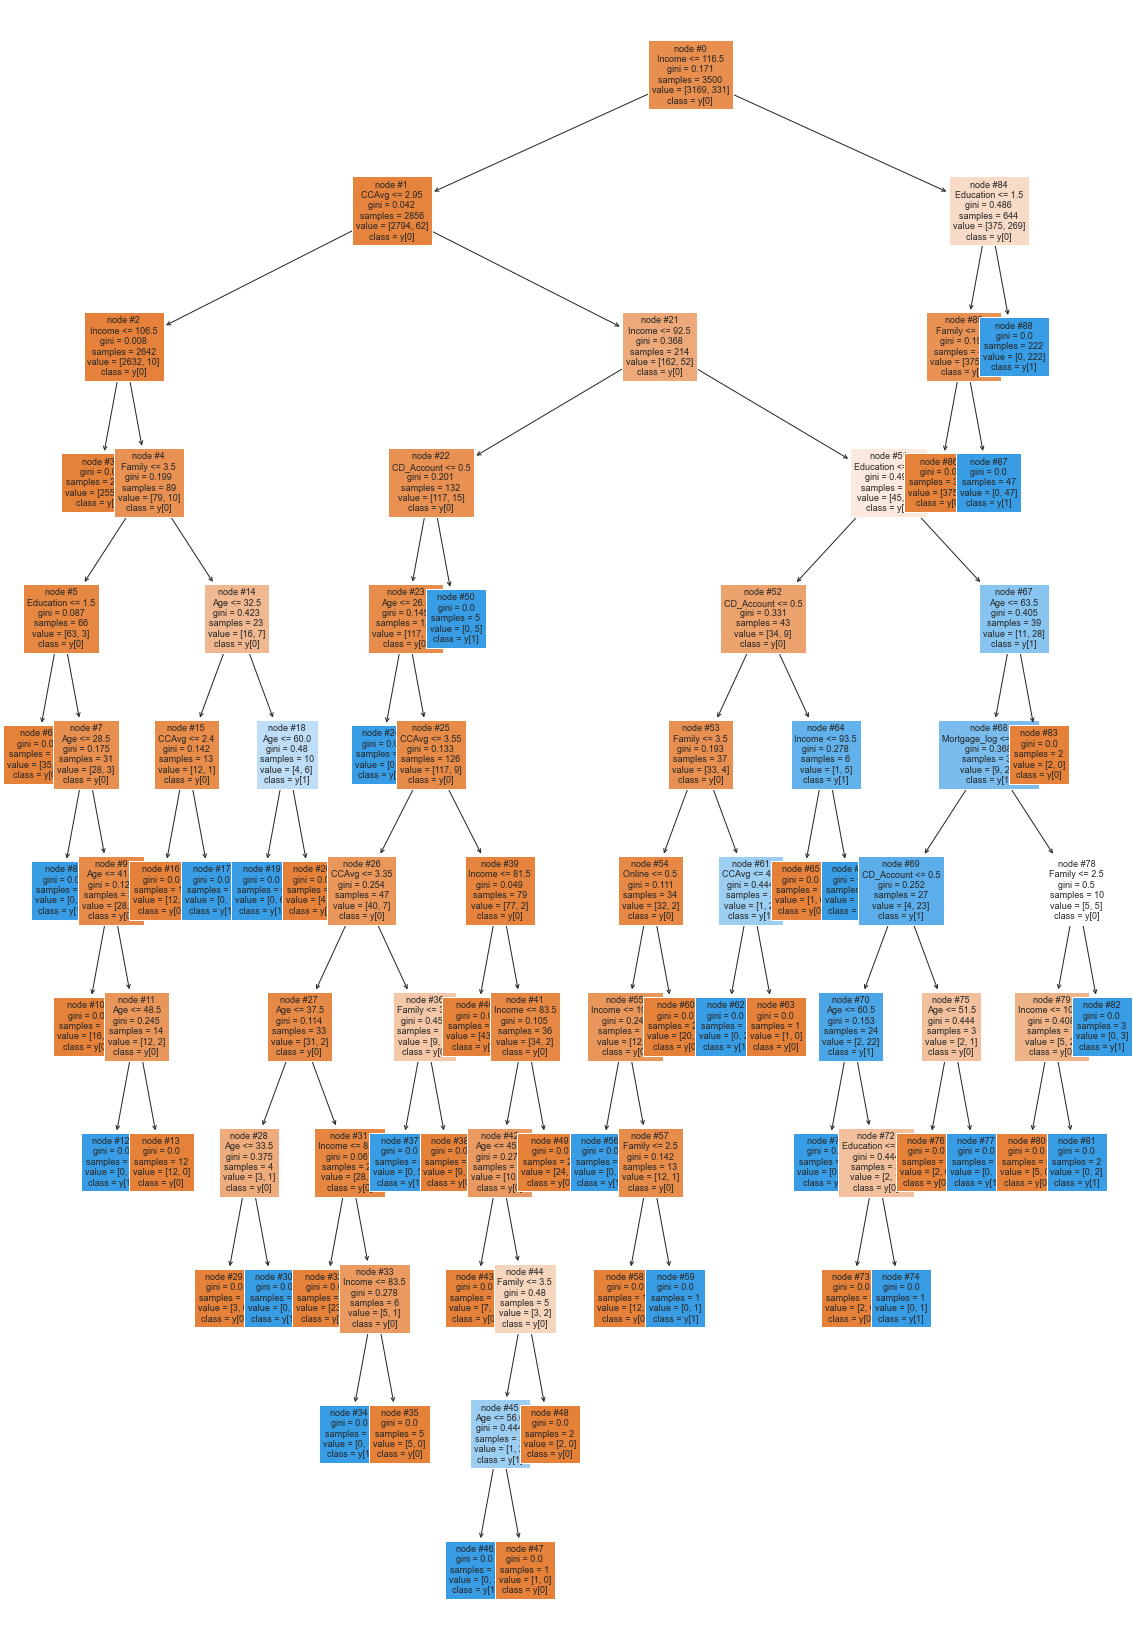

In [677]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [678]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- weights: [35.00, 0.00] class: 0
|   |   |   |   |--- Education >  1.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- Age <= 41.50
|   |   |   |   |   |   |   |--- weights: [16.00, 0.00] class: 0
|   |   |   |   |   |   |--- Age >  41.50
|   |   |   |   |   |   |   |--- Age <= 48.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |--- Age >  48.50
|   |   |   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Age <= 32.50
|   |   |   |   |   |--- CCAvg <= 2.40
|   |   |   |   |   |   |--- weights: [12.00, 0.00] class:

In [679]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False))

                    Importance
Education             0.403690
Income                0.312168
Family                0.165732
CCAvg                 0.047488
Age                   0.041636
CD_Account            0.025711
Mortgage_log          0.003014
Online                0.000561
Securities_Account    0.000000
CreditCard            0.000000
900-908               0.000000
910-934               0.000000
935-966               0.000000


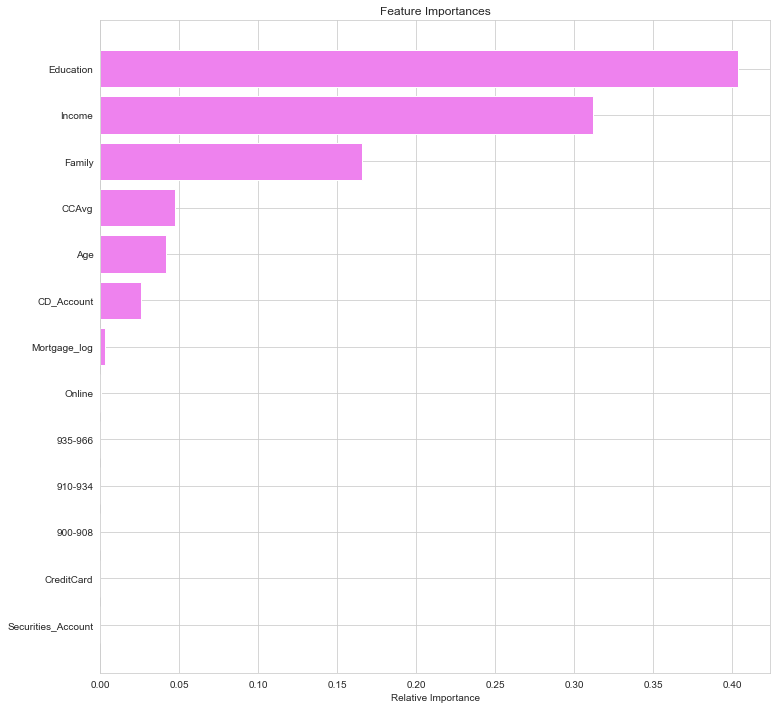

In [680]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

This model is very complex, so using GridSearch will help us assess the best parameters to conduct our decision tree without risking underfitting. 

However, before that, we can see if the qualifiers of the type of customer can be advantageous parameters to construct our decision tree.

In [681]:
X_3 = DOI_LR_3.drop(["Personal_Loan"], axis=1)
Y_3 = DOI_LR_3["Personal_Loan"]


# Splitting data in train and test sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_3, Y_3, test_size=0.30, random_state=1)

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train3, y_train3)

# Scoring the resulting tree with added variables

print("Accuracy on training set : ",dTree.score(X_train3, y_train3))
print("Accuracy on test set : ",dTree.score(X_test3, y_test3))


make_confusion_matrix(dTree,y_test3)


# Recall on train and test
get_recall_score(dTree)

feature_names = list(X_3.columns)
print(feature_names)

plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

# Text report showing the rules of a decision tree -
print()
print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

# importance of features in the tree building 

print (pd.DataFrame(dTree.feature_importances_, columns = ["Importance"], index = X_train3.columns).sort_values(by = 'Importance', ascending = False))

importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Accuracy on training set :  1.0
Accuracy on test set :  0.9766666666666667


ValueError: X has 13 features, but DecisionTreeClassifier is expecting 14 features as input.

Despite the observations of the distribution of costumers seen in the Venn Diagrams, these parameters are not showing any signs of contributing to the predictive performance of the model. So whiel interesting, it is fair to assess that the primary prepared dataframe was effectively engineered as is.

We will return the variables to the originals and continue.

### Using GridSearch for Hyperparameter tuning 

In [ ]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
            'criterion': ['gini','entropy'],
            'max_depth': np.arange(1,10), 
            'min_samples_split': np.arange(1,10),
            'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
            'max_leaf_nodes' : [2, 3, 5, 10],
            'min_impurity_decrease': [0.001,0.01,0.1],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_obj.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_obj.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_obj.best_params_)

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)


 Results from Grid Search 

 The best estimator across ALL searched params:
 DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

 The best score across ALL searched params:
 0.9123021257349615

 The best parameters across ALL searched params:
 {'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 1, 'min_samples_split': 2}


DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

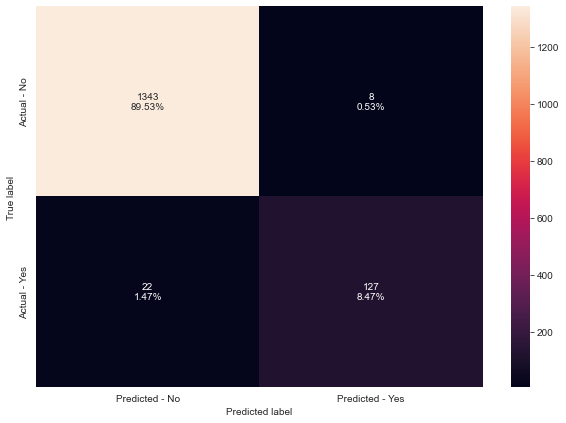

In [ ]:
make_confusion_matrix(estimator,y_test)

In [ ]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
# Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.9885714285714285
Accuracy on test set :  0.98
Recall on training set :  0.9123867069486404
Recall on test set :  0.8523489932885906


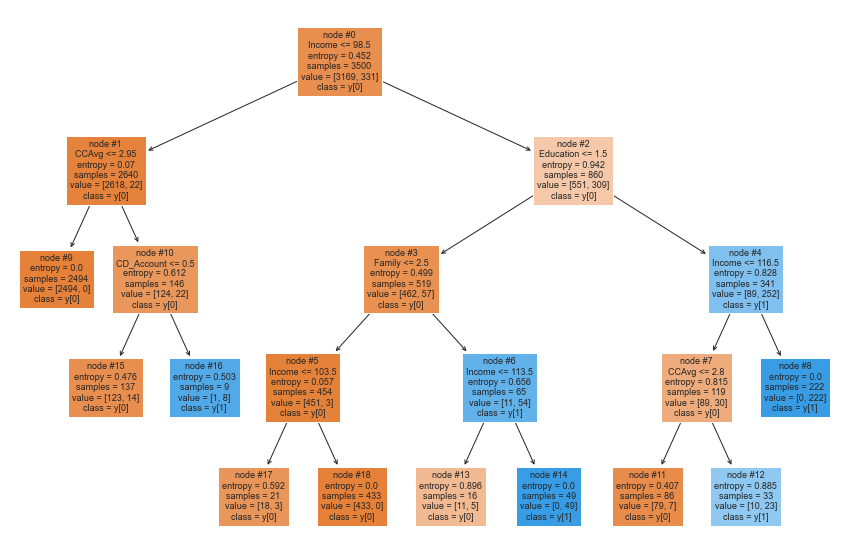

In [ ]:
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

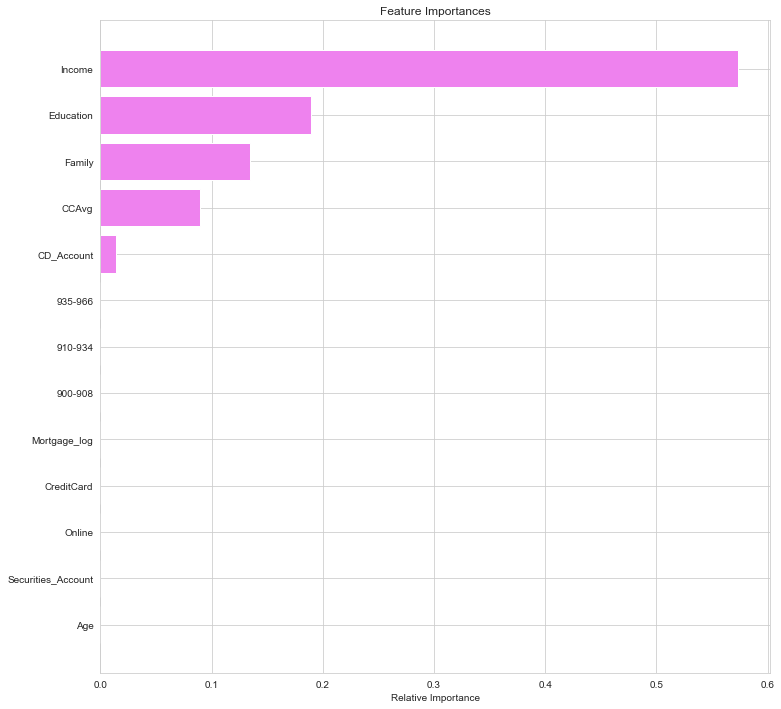

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [682]:
# Text report showing the rules of a decision tree -
feature_names = list(X.columns)
print(feature_names)
print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Mortgage_log', '900-908', '910-934', '935-966']
|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2494.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- weights: [123.00, 14.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [1.00, 8.00] class: 1
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 103.50
|   |   |   |   |--- weights: [18.00, 3.00] class: 0
|   |   |   |--- Income >  103.50
|   |   |   |   |--- weights: [433.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- Income <= 113.50
|   |   |   |   |--- weights: [11.00, 5.00] class: 0
|   |   |   |--- Income >  113.50
|   |   |   |   |--- weights: [0.00, 49.00] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 2.80
|   |   |   |   |--- we

### Conclusion
We are able to develop a decision tree model with only 4 layers of depth with a performance recall score of 0.85. We see that our model is able to very accurately (+0.98) determine which kind of customer is very likely to accept the personal loan. We also observe that our Decision Tree model had a much higher performance than the Logistic Regression model.
Primarily we can assess that income is the biggest contributing factor to targetting potential personal loan applicants, with education, family size, credit card usage and having a checking account with the bank being the other contributing factors. Using our Decision Tree model we can generally summarize the profile of the customer that would take the offer:
- Low income customers (<98k salary) with a checking account and high credit card usage
- Higher income customers (>98k salary) that have a larger family (3+ members) with lower levels of education
- Customers with high education that despite having a sub 100k salary have a high credit card usage
- Customers with high education with >116k salary


From our models, we would recommend that information is further obtained from new or untargeted customers and ran through both models. Using the logistic regression model, more customers that would match those that didn't take the offer in the past would be targeted, given that it is prone to false positives. If stretching the reach of the campaign would not be too expensive, this could be a desirable approach.

For a more targeted and better performing prediction, the decision tree should be used to target new customers. If the performance of our model is in fact sustainable, only ~1.5% of the untargeted customers would have accepted the offer.

The potential to raise the personal loan acceptance rate to +10% should be motivation for further revising the model if a secondary development phase were to arise.


